In [121]:
import pandas as pd
import os
import requests
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
%matplotlib inline

In [122]:
#https://docs.google.com/document/d/1voRFKYVcaNlyWLFosLvdVbpw39z5i6QFZemXZJct3yE/edit

In [123]:
cwd = os.getcwd()
cwd

'C:\\Users\\darre\\Desktop'

In [124]:
os.chdir('..')
os.getcwd()
os.chdir('C:\\Users\\darre\\Desktop')
os.getcwd()
os.listdir('.')

['.ipynb_checkpoints',
 'BCHI Data.csv',
 'data',
 'desktop.ini',
 'Inferential Statistics Exercise 1 Darren Jacoby.ipynb',
 'Inferential Statistics Exercise 2 Darren Jacoby.ipynb',
 'Inferential Statistics Exercise 3 Darren Jacoby.ipynb',
 'Linear Regression Exercise 1.ipynb',
 'LinkedIn Summary V2.txt',
 'Logistic Regression Exercise 1.ipynb',
 'queries_all.csv',
 'Search Strategy and Data Extraction.txt',
 'Shift.lnk',
 'springboard-test',
 'springboard-test_OG',
 'SubSaharan1.xlsx',
 'SubSaharan2.xlsx']

## Project Breakdown: First Data Source
#### Department of Health Services (DHS) Surveys since 1980
#### Publicly available survey findings downloaded for 8 metrics from all Sub-Saharan African nations since 1980:
* Infant Mortality Rate
* Under-five mortality rate
* Received all 8 basic vaccinations
* Children stunted
* HIV prevalence amongst men
* HIV prevalence amongst women
* HIV prevalence amongst population 
##### Received as csv with > 1200 rows, each row being one metric value for one country in one survey.


In [125]:
#Importing export of Department of Health Services (DHS) surveys and chosen statistics for Sub-Saharan Africa from 1980 to present
file = 'SubSaharan2.xlsx'
x1=pd.ExcelFile(file)
print(x1.sheet_names)
surveys=x1.parse('Indicator Data')
surveys.head(10)

['Indicator Data']


,Country Code,Country Name,Survey Year,Survey Name,Indicator,By Variable,Characteristic Category,Characteristic Label,Value,CI High,CI Low,CI High.1,CI Low.1
0,AO,Angola,2011.0,2011 MIS,Unmet need for family planning,NaN,Total,Total,NaN,NaN,NaN,NaN,NaN
1,AO,Angola,2011.0,2011 MIS,Infant mortality rate,NaN,Total,Total,50.0,NaN,NaN,NaN,NaN
2,AO,Angola,2011.0,2011 MIS,Under-five mortality rate,NaN,Total,Total,91.0,NaN,NaN,NaN,NaN
3,AO,Angola,2011.0,2011 MIS,Received all 8 basic vaccinations,NaN,Total,Total,NaN,NaN,NaN,NaN,NaN
4,AO,Angola,2011.0,2011 MIS,Children stunted,NaN,Total,Total,NaN,NaN,NaN,NaN,NaN
5,AO,Angola,2011.0,2011 MIS,HIV prevalence among women,NaN,Total,Total,NaN,NaN,NaN,NaN,NaN
6,AO,Angola,2011.0,2011 MIS,HIV prevalence among men,NaN,Total,Total,NaN,NaN,NaN,NaN,NaN
7,AO,Angola,2011.0,2011 MIS,HIV prevalence among general population,NaN,Total,Total,NaN,NaN,NaN,NaN,NaN
8,AO,Angola,2015.0,2015-16 DHS,Unmet need for family planning,NaN,Total,Total,38.0,NaN,NaN,NaN,NaN
9,AO,Angola,2015.0,2015-16 DHS,Infant mortality rate,NaN,Total,Total,44.0,NaN,NaN,NaN,NaN


### Wrangling Process: DHS Surveys
* Download CSV from Statcompiler and turned into DF
* After finding issue in naming convention by using value_counts plot, isolate some incorrectly included rows and cut them from the DF
* Create dictionary of African regions (East, West, South, Central) and append appropriate region to each country in the DHS Survey DF
* Run data quality report to learn about quality of survey responses
* Create a dictionary of dictionaries for all metrics for all countries, calculating the % change from the final survey metric value from the first survey metric value by country, and storing the delta for each country in each metric. Since countries had surveys in different years, have to use valid_index functions to calculate correctly
* After capturing YoY changes, calculate where each country ranked amongst other countries for that metric
* Then, use each countries ranks across the metrics to create a Super Metric, i.e. the mean of the country’s ranks, to see how strong each country had improved across the Global Health landscape since 1980


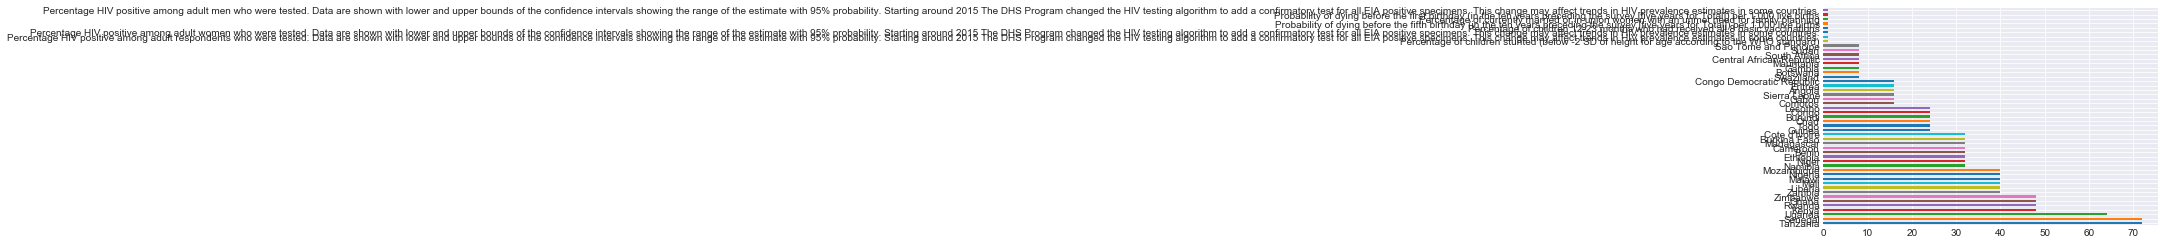

In [126]:
surveys['Country Name'].value_counts().plot.barh()
#Country name is not accurate in export

0                                                      AO
1                                                      AO
2                                                      AO
3                                                      AO
4                                                      AO
5                                                      AO
6                                                      AO
7                                                      AO
8                                                      AO
9                                                      AO
10                                                     AO
11                                                     AO
12                                                     AO
13                                                     AO
14                                                     AO
15                                                     AO
16                                                     BJ
17            

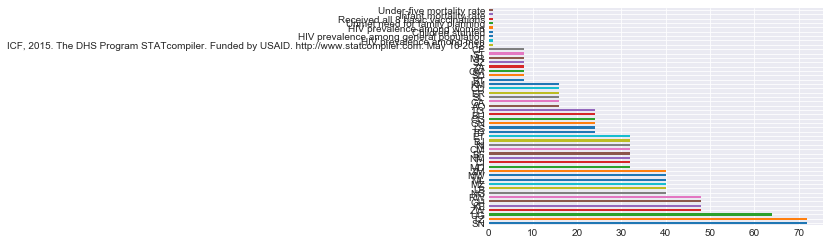

In [127]:
#Finding where the issue is with country name
surveys['Country Code'].value_counts().plot.barh()
surveys['Country Code'].values
surveys['Country Code']
#seems last rows explain what the metrics exported are

In [128]:
surveys.tail(10)
#The last ten rows are there to explain what the columns mean. we will remove them from the dataset

,Country Code,Country Name,Survey Year,Survey Name,Indicator,By Variable,Characteristic Category,Characteristic Label,Value,CI High,CI Low,CI High.1,CI Low.1
1200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1201,Unmet need for family planning,Percentage of currently married or in union wo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1202,Infant mortality rate,Probability of dying before the first birthday...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1203,Under-five mortality rate,Probability of dying before the fifth birthday...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1204,Received all 8 basic vaccinations,Percentage of children 12-23 months who had re...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1205,Children stunted,Percentage of children stunted (below -2 SD of...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,HIV prevalence among general population,Percentage HIV positive among adult respondent...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1207,HIV prevalence among women,Percentage HIV positive among adult women who ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1208,HIV prevalence among men,Percentage HIV positive among adult men who we...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1209,"ICF, 2015. The DHS Program STATcompiler. Funde...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
surveys=surveys.head(1199)

In [130]:
#Creating dictionary with countries and regions
regions={}
regions.update(dict.fromkeys(['Algeria', 'Egypt','Libya','Morocco','South Sudan','Sudan','Tunisia'],'North Africa'))
regions.update(dict.fromkeys([
    'Benin',
    'Burkina Faso',
    'Cape Verde',
    'Cote d\'Ivoire',
    'Gambia',
    'Ghana',
    'Guinea',
    'Liberia',
    'Mali',
    'Mauritania',
    'Niger',
    'Nigeria',
    'Saint Helena',
    'Senegal',
    'Sierra Leone',
    'Togo'],'West Africa'))
regions.update(dict.fromkeys([
    'Burundi',
    'Comoros',
    'Djibouti',
    'Eritrea',
    'Ethiopia',
    'Kenya',
    'Madagascar',
    'Malawi',
    'Mauritius',
    'Mayotte',
    'Mozambique',
    'Reunion',
    'Rwanda',
    'Seychelles',
    'Somalia',
    'Tanzania',
    'Uganda',
    'Zambia',
    'Zimbabwe'
],'East Africa'))
regions.update(dict.fromkeys([
    'Angola',
    'Cameroon',
    'Central African Republic',
    'Chad',
    'Congo',
    'Congo Democratic Republic',
    'Equatorial Guinea',
    'Gabon',
    'Sao Tome and Principe'
],'Central Africa'))
regions.update(dict.fromkeys([
    'Botswana',
    'Lesotho',
    'Namibia',
    'South Africa',
    'Swaziland'
],'South Africa'))


In [131]:
surveys['Region']=surveys['Country Name'].apply(lambda row: regions.get(row))
surveys.head()
#rearrange the columns
surveys = surveys[['Country Code', 'Survey Year','Country Name', 'Region','Survey Name','Indicator','By Variable','Characteristic Category','Characteristic Label','Value','CI High','CI Low','CI High.1','CI Low.1']]
surveys.head(100)

,Country Code,Survey Year,Country Name,Region,Survey Name,Indicator,By Variable,Characteristic Category,Characteristic Label,Value,CI High,CI Low,CI High.1,CI Low.1
0,AO,2011.0,Angola,Central Africa,2011 MIS,Unmet need for family planning,NaN,Total,Total,NaN,NaN,NaN,NaN,NaN
1,AO,2011.0,Angola,Central Africa,2011 MIS,Infant mortality rate,NaN,Total,Total,50.0,NaN,NaN,NaN,NaN
2,AO,2011.0,Angola,Central Africa,2011 MIS,Under-five mortality rate,NaN,Total,Total,91.0,NaN,NaN,NaN,NaN
3,AO,2011.0,Angola,Central Africa,2011 MIS,Received all 8 basic vaccinations,NaN,Total,Total,NaN,NaN,NaN,NaN,NaN
4,AO,2011.0,Angola,Central Africa,2011 MIS,Children stunted,NaN,Total,Total,NaN,NaN,NaN,NaN,NaN
5,AO,2011.0,Angola,Central Africa,2011 MIS,HIV prevalence among women,NaN,Total,Total,NaN,NaN,NaN,NaN,NaN
6,AO,2011.0,Angola,Central Africa,2011 MIS,HIV prevalence among men,NaN,Total,Total,NaN,NaN,NaN,NaN,NaN
7,AO,2011.0,Angola,Central Africa,2011 MIS,HIV prevalence among general population,NaN,Total,Total,NaN,NaN,NaN,NaN,NaN
8,AO,2015.0,Angola,Central Africa,2015-16 DHS,Unmet need for family planning,NaN,Total,Total,38.0,NaN,NaN,NaN,NaN
9,AO,2015.0,Angola,Central Africa,2015-16 DHS,Infant mortality rate,NaN,Total,Total,44.0,NaN,NaN,NaN,NaN


In [132]:
#Running data quality report
df=surveys.copy()
columns = list(df.columns.values)
data_types = pd.DataFrame(df.dtypes,columns=['dtype'])
missing_data_counts = pd.DataFrame(df.isnull().sum(),columns=['missing'])
present_data_counts = pd.DataFrame(df.count(),columns=['count'])
unique_value_counts = pd.DataFrame(columns=['unique'])
#for v in list(df.columns.values):
#    unique_value_counts.loc[v] = [df[v].nunique()]
#minimum_values = pd.DataFrame(columns=['min'])
#for v in list(df.columns.values):
#    minimum_values.loc[v] = [df[v].min()]
#maximum_values = pd.DataFrame(columns=['max'])
#for v in list(df.columns.values):
#    maximum_values.loc[v] = [df[v].max()]
data_quality_report = (data_types.join(present_data_counts).join(missing_data_counts).
                       join(unique_value_counts))#.join(minimum_values).
                       #join(maximum_values)

print("\nData Quality Report")
print("Total records: {}".format(len(df.index)))
data_quality_report.sort_values(['missing'], ascending=False)


Data Quality Report
Total records: 1199


,dtype,count,missing,unique
By Variable,float64,0,1199,NaN
CI High.1,float64,0,1199,NaN
CI Low.1,float64,0,1199,NaN
CI High,float64,182,1017,NaN
CI Low,float64,182,1017,NaN
Value,float64,736,463,NaN
Country Code,object,1199,0,NaN
Survey Year,float64,1199,0,NaN
Country Name,object,1199,0,NaN
Region,object,1199,0,NaN


##### Tells us about 60% of metrics are included, while only 15% of all metrics have an included confidence interval. 
###### We can also drop the 3 empty columns 
* CI High.1
* CI Low.1
* By Variable

In [133]:
surveys = surveys[['Country Code', 'Survey Year','Country Name', 'Region','Survey Name','Indicator','Characteristic Category','Characteristic Label','Value','CI High','CI Low']]
surveys.head(10)

,Country Code,Survey Year,Country Name,Region,Survey Name,Indicator,Characteristic Category,Characteristic Label,Value,CI High,CI Low
0,AO,2011.0,Angola,Central Africa,2011 MIS,Unmet need for family planning,Total,Total,NaN,NaN,NaN
1,AO,2011.0,Angola,Central Africa,2011 MIS,Infant mortality rate,Total,Total,50.0,NaN,NaN
2,AO,2011.0,Angola,Central Africa,2011 MIS,Under-five mortality rate,Total,Total,91.0,NaN,NaN
3,AO,2011.0,Angola,Central Africa,2011 MIS,Received all 8 basic vaccinations,Total,Total,NaN,NaN,NaN
4,AO,2011.0,Angola,Central Africa,2011 MIS,Children stunted,Total,Total,NaN,NaN,NaN
5,AO,2011.0,Angola,Central Africa,2011 MIS,HIV prevalence among women,Total,Total,NaN,NaN,NaN
6,AO,2011.0,Angola,Central Africa,2011 MIS,HIV prevalence among men,Total,Total,NaN,NaN,NaN
7,AO,2011.0,Angola,Central Africa,2011 MIS,HIV prevalence among general population,Total,Total,NaN,NaN,NaN
8,AO,2015.0,Angola,Central Africa,2015-16 DHS,Unmet need for family planning,Total,Total,38.0,NaN,NaN
9,AO,2015.0,Angola,Central Africa,2015-16 DHS,Infant mortality rate,Total,Total,44.0,NaN,NaN


In [134]:
surveys_clean_df=surveys
#surveys_clean=~np.isnan(surveys['Value'])
surveys_clean_df=surveys_clean_df.loc[surveys_clean_df['Value'].notnull()]
surveys_clean_df=surveys_clean_df[['Survey Year','Country Name','Region','Indicator','Value']]
surveys_clean_df.head()

,Survey Year,Country Name,Region,Indicator,Value
1,2011.0,Angola,Central Africa,Infant mortality rate,50.0
2,2011.0,Angola,Central Africa,Under-five mortality rate,91.0
8,2015.0,Angola,Central Africa,Unmet need for family planning,38.0
9,2015.0,Angola,Central Africa,Infant mortality rate,44.0
10,2015.0,Angola,Central Africa,Under-five mortality rate,68.0


In [135]:
infant_clean=surveys_clean_df[surveys_clean_df['Indicator']=='Infant mortality rate']
infant_clean.groupby(['Survey Year','Region']).mean()

Value
Survey Year Region                    
1986.0      West Africa     116.000000
1987.0      East Africa      74.000000
            West Africa     105.000000
1988.0      East Africa      73.500000
            South Africa     38.000000
            West Africa      77.000000
1989.0      East Africa      61.000000
1990.0      North Africa     70.000000
            West Africa      87.000000
1991.0      Central Africa   64.000000
1992.0      East Africa     102.400000
            South Africa     57.000000
            West Africa     123.000000
1993.0      East Africa      62.000000
            West Africa      76.000000
1994.0      Central Africa   97.000000
            East Africa      53.000000
            West Africa      89.000000
1995.0      East Africa      73.500000
1996.0      East Africa      91.000000
            West Africa     108.000000
1997.0      Central Africa  103.000000
            East Africa     115.500000
            West Africa      68.000000
1998.0      Central Africa   77.000000
            East Africa      74.000000
            South Africa     45.000000
            West Africa      93.000000
1999.0      East Africa      82.000000
            West Africa     101.500000
...                                ...
2006.0      South Africa     65.500000
            West Africa      81.333333
2007.0      Central Africa   92.000000
            East Africa      64.000000
            West Africa      71.000000
2008.0      Central Africa   38.000000
            East Africa      54.000000
            West Africa      71.333333
2009.0      South Africa     91.000000
            West Africa      73.000000
2010.0      East Africa      56.600000
            West Africa      63.333333
2011.0      Central Africa   50.333333
            East Africa      59.000000
2012.0      Central Africa   43.000000
            East Africa      36.000000
            West Africa      54.500000
2013.0      Central Africa   58.000000
            East Africa      45.000000
            South Africa     39.000000
            West Africa      59.600000
2014.0      Central Africa   72.000000
            East Africa      39.000000
            South Africa     59.000000
            West Africa      37.000000
2015.0      Central Africa   44.000000
            East Africa      41.750000
            West Africa      39.000000
2016.0      East Africa      46.000000
            West Africa      36.000000

[75 rows x 1 columns]

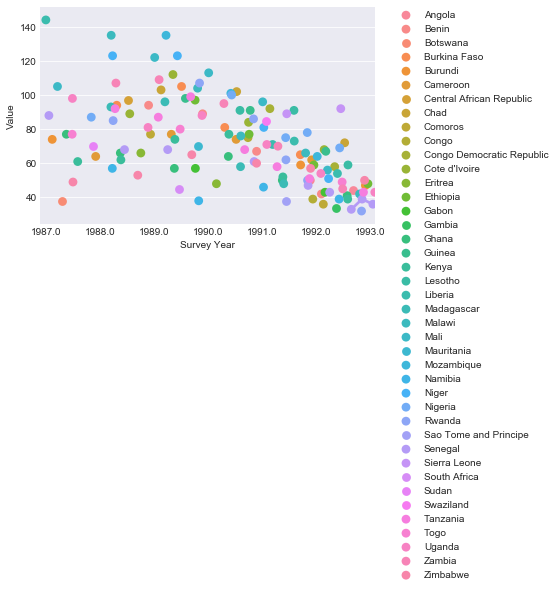

In [136]:
import matplotlib.ticker as ticker 
ax= sns.pointplot(x='Survey Year',y='Value',hue='Country Name',data=infant_clean,dodge=True,errwidth=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5)) 
#ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

Text(0.5,1,'Metrics captured Per Country from 1970-2015')

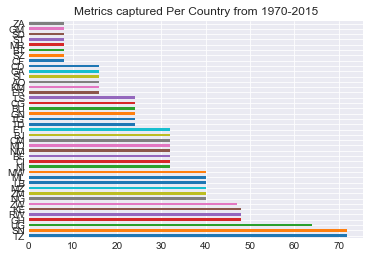

In [137]:
#Plotting survey count by country
surveys['Country Code'].value_counts().plot.barh().set_title('Metrics captured Per Country from 1970-2015')
#too many surveys -- this is counting each metric in each survey

Text(0.5,1,'Surveys Per Country from 1970-2015')

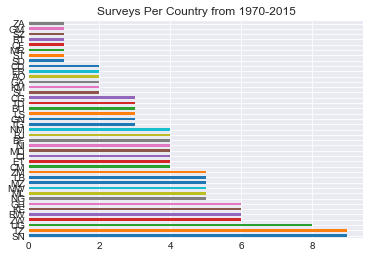

In [138]:
#need to look at just one metric, because each row is one data point in one survey, and we want to get survey count
surveys_infant=surveys.loc[surveys['Indicator']=='Infant mortality rate']
surveys_infant['Country Code'].value_counts().plot.barh().set_title('Surveys Per Country from 1970-2015')

###### Most a country has is 9 surveys (Tanzania, Senegal). Some countries only have one survey done.

,Region
Country,
East Africa,19
West Africa,16
Central Africa,9
North Africa,7
South Africa,5


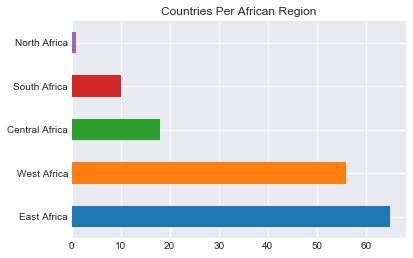

In [139]:
#Plotting number of countries in each region
surveys_infant['Region'].value_counts().plot.barh().set_title('Countries Per African Region')
#Looking at a per-country basis
#Count of countries for each key in regions dict
region_df=pd.DataFrame(list(regions.items()),columns=['Region','Country'])
region_df.head()
pd.pivot_table(region_df,values='Region',index=['Country'],aggfunc='count').sort_values('Region',ascending=False)

                Country Code  Country Count
Region                                     
East Africa               65             19
West Africa               56             16
Central Africa            18              9
South Africa              10             10
North Africa               1              1


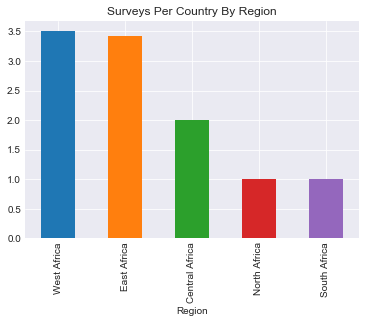

In [140]:
#Looking at Surveys Per Country By Region, understanding which countries have been best surveyed
surveys_per_country=pd.pivot_table(surveys_infant,values='Country Code',index=['Region'],aggfunc='count').sort_values('Country Code',ascending=False)
surveys_per_country['Country Count']=[19,16,9,10,1]
print(surveys_per_country)
surveys_per_country=surveys_per_country['Country Code']/surveys_per_country['Country Count']
surveys_per_country.head()
surveys_per_country.sort_values(ascending=False).plot(kind='bar',title='Surveys Per Country By Region')


##### Clearly West and East Africa have been the best surveyed regions, while North and South Africa have only done one survey per country over the entire time horizon

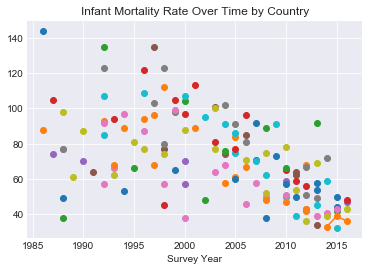

In [141]:
#Plotting average for each country for one metric (Infant mortality)
surveys_infant=surveys.loc[surveys['Indicator']=='Infant mortality rate']
infant=pd.pivot_table(surveys_infant,values='Value',index='Survey Year',columns='Country Name')
infant.head()
infant.plot.line(legend=None, marker='o',title='Infant Mortality Rate Over Time by Country')
plt.show()
#can make this a line graph by masking the NaN https://stackoverflow.com/questions/14399689/matplotlib-drawing-lines-between-points-ignoring-missing-data?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
#make this plot for all metrics

In [142]:
infant.head()
#get this in 4 columns, sns
#reshape to be Year, Country, Metric, Value. should be easier to plot

Country Name,Angola,Benin,Botswana,Burkina Faso,Burundi,Cameroon,Central African Republic,Chad,Comoros,Congo,...,Senegal,Sierra Leone,South Africa,Sudan,Swaziland,Tanzania,Togo,Uganda,Zambia,Zimbabwe
Survey Year,,,,,,,,,,,,,,,,,,,,,
1986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987.0,NaN,NaN,NaN,NaN,74.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988.0,NaN,NaN,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,77.0,98.0,NaN,49.0
1989.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN


Infant mortality rate
Unmet need for family planning
Under-five mortality rate
Received all 8 basic vaccinations
Children stunted
HIV prevalence among men


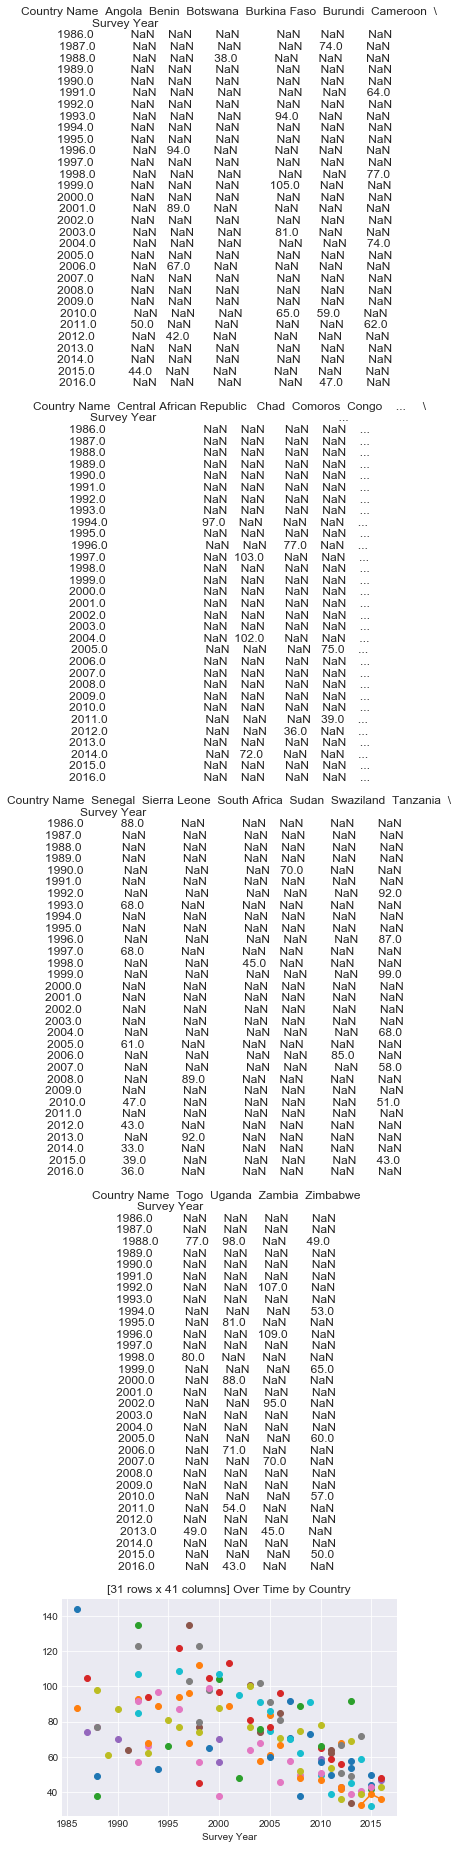

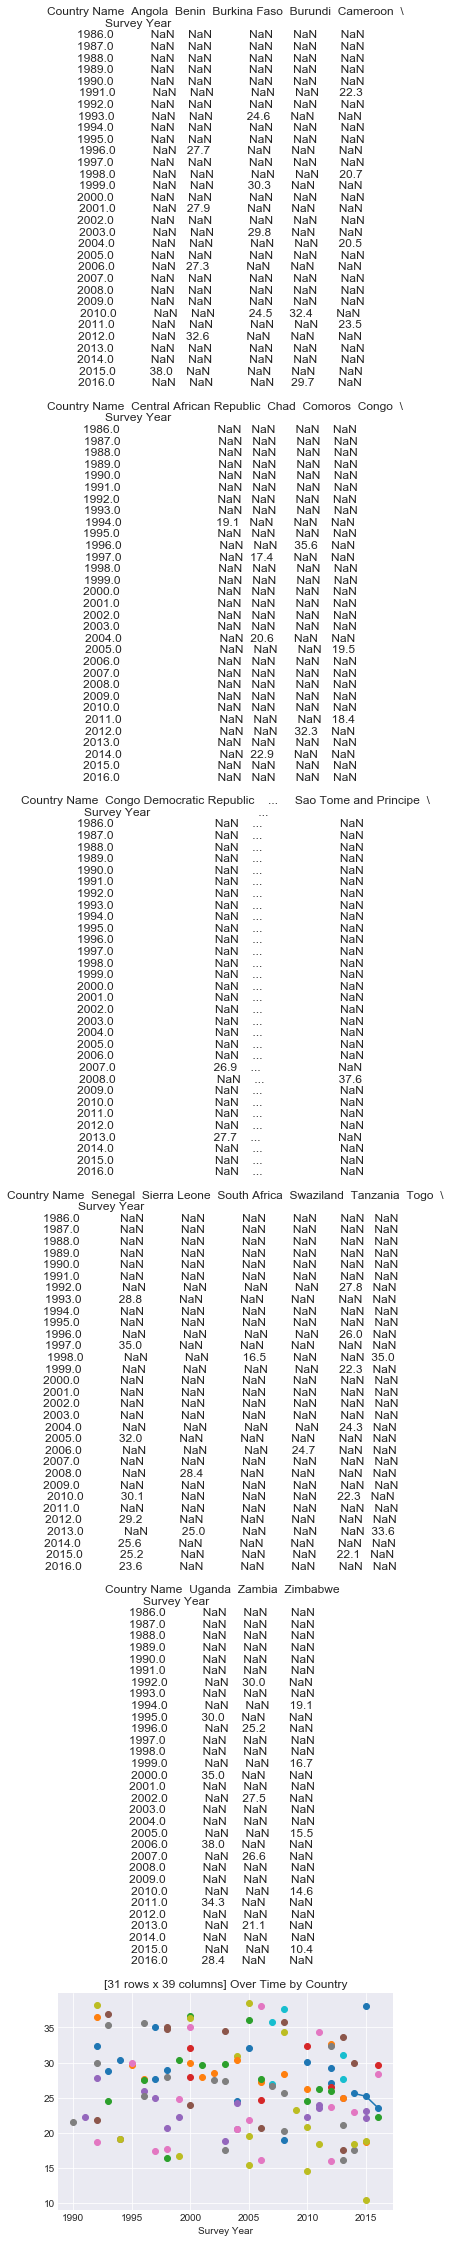

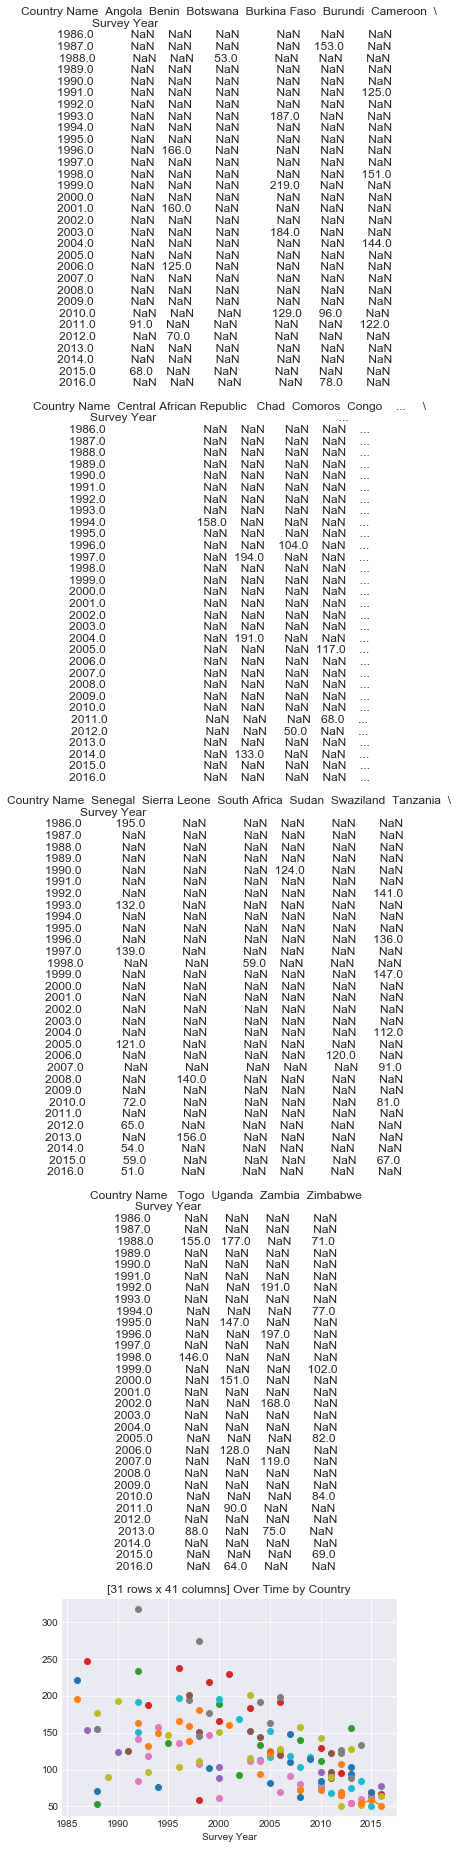

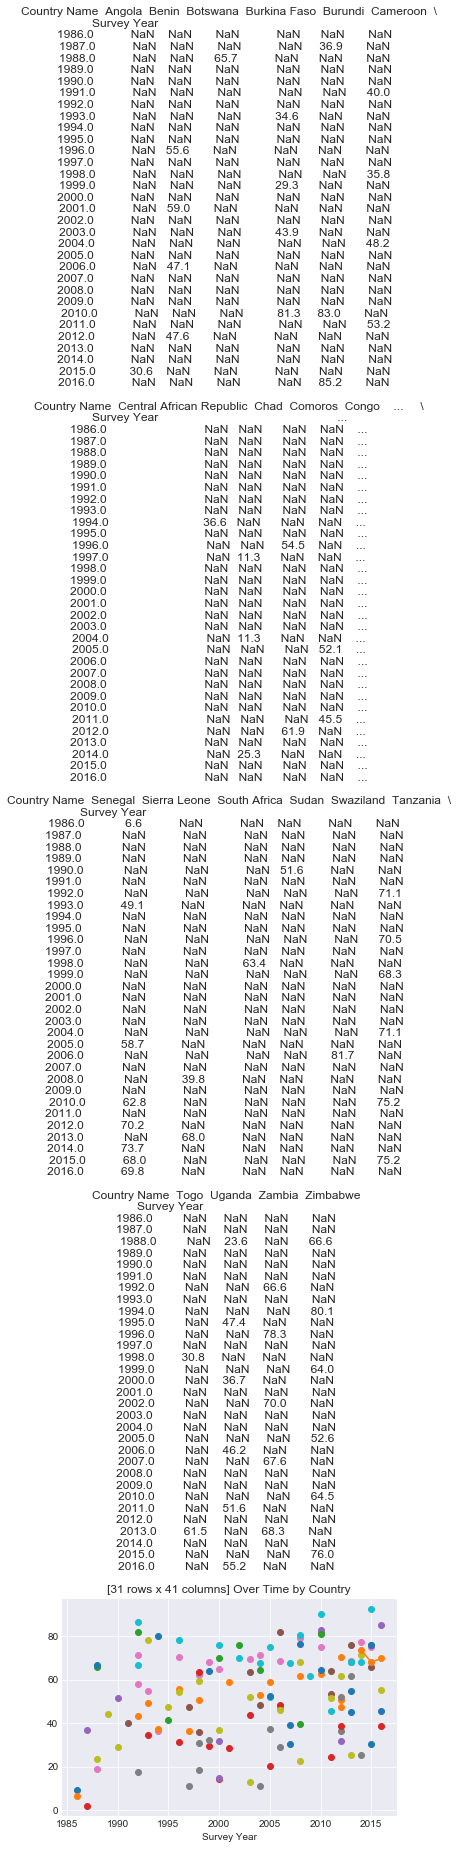

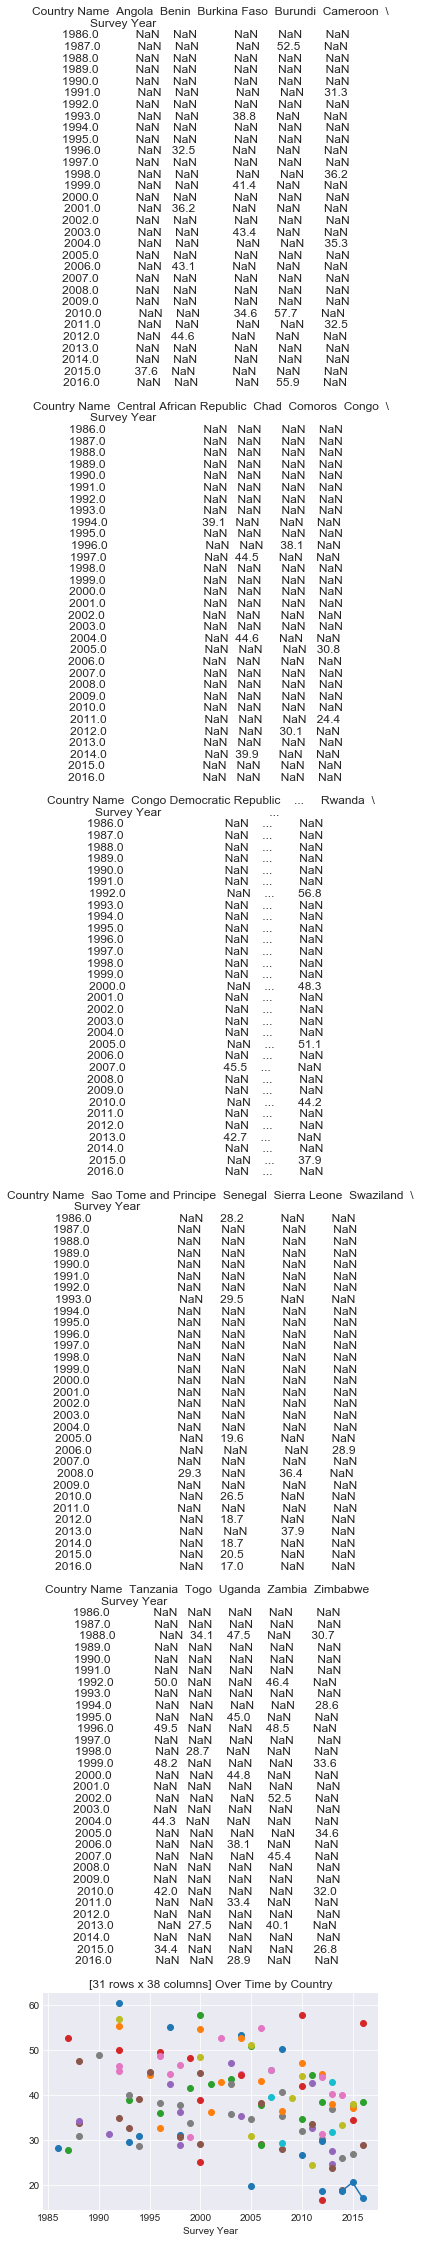

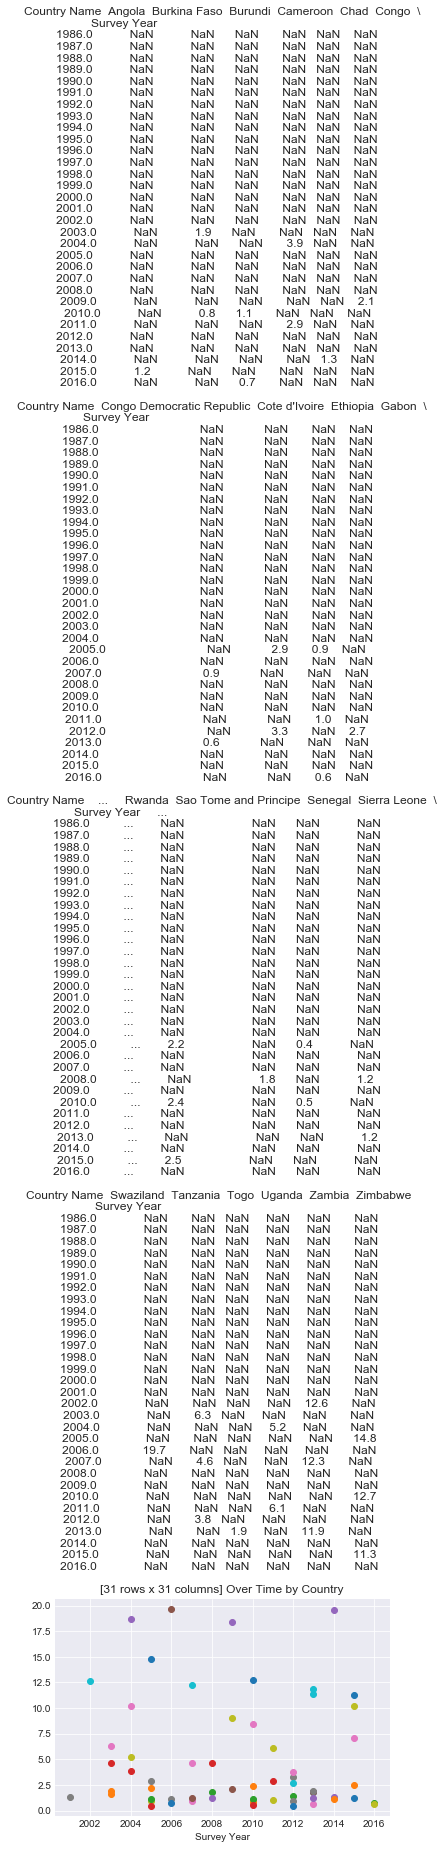

In [143]:
#Need help finding the error here. How to properly title these graphs
#Need help subplotting these graphs
#Need to connect the non-NaN values into line graphs
metrics=['Infant mortality rate','Unmet need for family planning','Under-five mortality rate','Received all 8 basic vaccinations','Children stunted','HIV prevalence among men']
for metric in metrics:
    print(metric)
    a=surveys.loc[surveys['Indicator']==metric]
    metric=pd.pivot_table(a,values='Value',index='Survey Year',columns='Country Name')
    metric.plot(legend=None, marker='o',title= str(metric)+' Over Time by Country')
plt.show()


In [144]:
#Creating Pivot Table for One Metric: Infant Mortality
infant_country_year=pd.pivot_table(surveys_infant,values='Value',index='Country Name',columns='Survey Year')
infant_country_year.head(10)

Survey Year,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
Country Name,,,,,,,,,,,,,,,,,,,,,
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,44.0,NaN
Benin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN,NaN,NaN
Botswana,NaN,NaN,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Burkina Faso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,...,NaN,NaN,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
Burundi,NaN,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,47.0
Cameroon,NaN,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN
Central African Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,NaN,NaN
Comoros,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN


In [145]:
#EDA
#null hypothesis: mean between Tanzania and Senegal (two most surveyed countries) is equal. t-test and bootstrap

In [146]:
infant_yoy_change=[]
for index, row in infant_country_year.iterrows():
    print(index)
    initial_year=row.first_valid_index()
    print(initial_year)
    initial_value=row.loc[row.first_valid_index()]
    print(initial_value)
    final_year=row.last_valid_index()
    print(final_year)
    final_value=row.loc[row.last_valid_index()]
    print(final_value)
    periods=final_year-initial_year
    print(periods)
    delta=final_value/initial_value
    print(delta)
    exponent=1.0/periods
    print(exponent)
    percent_change=((delta**exponent)-1)*100
    print('Percent Change: ' + str(round(percent_change,2))+'%')
    infant_yoy_change.append(percent_change)

Angola
2011.0
50.0
2015.0
44.0
4.0
0.88
0.25
Percent Change: -3.15%
Benin
1996.0
94.0
2012.0
42.0
16.0
0.44680851063829785
0.0625
Percent Change: -4.91%
Botswana
1988.0
38.0
1988.0
38.0
0.0
1.0
inf
Percent Change: 0.0%
Burkina Faso
1993.0
94.0
2010.0
65.0
17.0
0.6914893617021277
0.058823529411764705
Percent Change: -2.15%
Burundi
1987.0
74.0
2016.0
47.0
29.0
0.6351351351351351
0.034482758620689655
Percent Change: -1.55%
Cameroon
1991.0
64.0
2011.0
62.0
20.0
0.96875
0.05
Percent Change: -0.16%
Central African Republic
1994.0
97.0
1994.0
97.0
0.0
1.0
inf
Percent Change: 0.0%
Chad
1997.0
103.0
2014.0
72.0
17.0
0.6990291262135923
0.058823529411764705
Percent Change: -2.08%
Comoros
1996.0
77.0
2012.0
36.0
16.0
0.4675324675324675
0.0625
Percent Change: -4.64%
Congo
2005.0
75.0
2011.0
39.0
6.0
0.52
0.16666666666666666
Percent Change: -10.33%
Congo Democratic Republic
2007.0
92.0
2013.0
58.0
6.0
0.6304347826086957
0.16666666666666666
Percent Change: -7.4%
Cote d'Ivoire
1994.0
89.0
2012.0
68.0


C:\Users\darre\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


In [147]:
#Creating pivot table of every metric in Country X Year Style
#Calculating the YoY change for each country in each metric
yoy_changes={}
pivot_tables={}
for metric in metrics:
    a=surveys.loc[surveys['Indicator']==metric]    
    pivot_tables[metric]=pd.pivot_table(a,values='Value',index='Country Name',columns='Survey Year')
    #Generate dataframe with name of the metric at hand, column names are Country, YoY Change
    print(metric)
    yoy_changes[metric]={}
    for index, row in pivot_tables[metric].iterrows():
        #if row.first_valid_index()==NaN
        if(row.isnull().all()):
            percent_change=np.nan
        else:
            initial_year=row.first_valid_index()
            initial_value=row.loc[row.first_valid_index()]
            final_year=row.last_valid_index()
            final_value=row.loc[row.last_valid_index()]
            periods=final_year-initial_year
            delta=final_value/initial_value
            exponent=1.0/periods
            percent_change=((delta**exponent)-1)*100
        print(index+' Percent Change: ' + str(round(percent_change,2))+'%')
        yoy_changes[metric][index]=percent_change

Infant mortality rate
Angola Percent Change: -3.15%
Benin Percent Change: -4.91%
Botswana Percent Change: 0.0%
Burkina Faso Percent Change: -2.15%
Burundi Percent Change: -1.55%
Cameroon Percent Change: -0.16%
Central African Republic Percent Change: 0.0%
Chad Percent Change: -2.08%
Comoros Percent Change: -4.64%
Congo Percent Change: -10.33%
Congo Democratic Republic Percent Change: -7.4%
Cote d'Ivoire Percent Change: -1.48%
Eritrea Percent Change: -4.45%
Ethiopia Percent Change: -4.3%
Gabon Percent Change: -2.32%
Gambia Percent Change: 0.0%
Ghana Percent Change: -2.39%
Guinea Percent Change: -2.88%
Kenya Percent Change: -1.77%
Lesotho Percent Change: -4.24%
Liberia Percent Change: -3.57%
Madagascar Percent Change: -4.05%
Malawi Percent Change: -4.95%
Mali Percent Change: -2.48%
Mauritania Percent Change: 0.0%
Mozambique Percent Change: -5.19%
Namibia Percent Change: -1.79%
Niger Percent Change: -4.31%
Nigeria Percent Change: -1.0%
Rwanda Percent Change: -4.16%
Sao Tome and Principe P

C:\Users\darre\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


Under-five mortality rate
Angola Percent Change: -7.02%
Benin Percent Change: -5.25%
Botswana Percent Change: 0.0%
Burkina Faso Percent Change: -2.16%
Burundi Percent Change: -2.3%
Cameroon Percent Change: -0.12%
Central African Republic Percent Change: 0.0%
Chad Percent Change: -2.2%
Comoros Percent Change: -4.47%
Congo Percent Change: -8.65%
Congo Democratic Republic Percent Change: -5.71%
Cote d'Ivoire Percent Change: -1.81%
Eritrea Percent Change: -5.28%
Ethiopia Percent Change: -5.51%
Gabon Percent Change: -2.58%
Gambia Percent Change: 0.0%
Ghana Percent Change: -3.58%
Guinea Percent Change: -2.76%
Kenya Percent Change: -2.17%
Lesotho Percent Change: -2.81%
Liberia Percent Change: -3.13%
Madagascar Percent Change: -4.98%
Malawi Percent Change: -5.48%
Mali Percent Change: -3.75%
Mauritania Percent Change: 0.0%
Mozambique Percent Change: -5.07%
Namibia Percent Change: -2.08%
Niger Percent Change: -4.49%
Nigeria Percent Change: -1.77%
Rwanda Percent Change: -4.69%
Sao Tome and Princi

In [148]:
yoy_changes['Infant mortality rate']

{'Angola': -3.145307188309876,
 'Benin': -4.910494306243828,
 'Botswana': 0.0,
 'Burkina Faso': -2.146668127131135,
 'Burundi': -1.553046624948684,
 'Cameroon': -0.15861756073679567,
 'Central African Republic': 0.0,
 'Chad': -2.084225596911349,
 'Comoros': -4.640660131253149,
 'Congo': -10.325859261556813,
 'Congo Democratic Republic': -7.400915199658109,
 "Cote d'Ivoire": -1.484037241220404,
 'Eritrea': -4.447408157528232,
 'Ethiopia': -4.301673342508128,
 'Gabon': -2.321390936310752,
 'Gambia': 0.0,
 'Ghana': -2.3948321247008075,
 'Guinea': -2.8828216422507436,
 'Kenya': -1.7733368577216302,
 'Lesotho': -4.240678124216446,
 'Liberia': -3.567510136095642,
 'Madagascar': -4.049466670608948,
 'Malawi': -4.949840761862035,
 'Mali': -2.4830860263588828,
 'Mauritania': 0.0,
 'Mozambique': -5.191744056326774,
 'Namibia': -1.7908634141819868,
 'Niger': -4.3063206425912215,
 'Nigeria': -1.0027714852601344,
 'Rwanda': -4.1585172454261965,
 'Sao Tome and Principe': 0.0,
 'Senegal': -2.93544653

In [149]:
yoy_changes.keys()

dict_keys(['Infant mortality rate', 'Unmet need for family planning', 'Under-five mortality rate', 'Received all 8 basic vaccinations', 'Children stunted', 'HIV prevalence among men'])

In [150]:
#Turn dictionary into DF with Country as left Index and Metric as top index.
fam_plan=pd.DataFrame(list(yoy_changes['Unmet need for family planning'].items()),columns=['Country','Unmet Need for Family Planning'])
fam_plan['rank']=fam_plan['Unmet Need for Family Planning'].rank(ascending=1)
fam_plan.sort_values(by='rank',ascending=True)
fam_plan

five_mortality=pd.DataFrame(list(yoy_changes['Under-five mortality rate'].items()),columns=['Country','Under-five mortality rate'])
five_mortality['rank']=five_mortality['Under-five mortality rate'].rank(ascending=1)
five_mortality.sort_values(by='rank',ascending=True)
five_mortality

vaccinations=pd.DataFrame(list(yoy_changes['Received all 8 basic vaccinations'].items()),columns=['Country','Received all 8 basic vaccinations'])
vaccinations['rank']=vaccinations['Received all 8 basic vaccinations'].rank(ascending=0)
vaccinations.sort_values(by='rank',ascending=True)
vaccinations

children_stunted=pd.DataFrame(list(yoy_changes['Children stunted'].items()),columns=['Country','Children stunted'])
children_stunted['rank']=children_stunted['Children stunted'].rank(ascending=1)
children_stunted.sort_values(by='rank',ascending=True)
children_stunted

male_HIV=pd.DataFrame(list(yoy_changes['HIV prevalence among men'].items()),columns=['Country','HIV prevalence among men'])
male_HIV['rank']=male_HIV['HIV prevalence among men'].rank(ascending=1)
male_HIV.sort_values(by='rank',ascending=True)

print(male_HIV.head())
print(vaccinations.head())
#Captures the difference in which directions metrics should be ranked. Ranked higher for reducing HIV prevalence and for increased vaccination access 

        Country  HIV prevalence among men  rank
0        Angola                  0.000000  18.0
1         Benin                       NaN   NaN
2      Botswana                       NaN   NaN
3  Burkina Faso                -11.624116   1.0
4       Burundi                 -7.256341   3.0
        Country  Received all 8 basic vaccinations  rank
0        Angola                           0.000000  33.0
1         Benin                          -0.966242  40.0
2      Botswana                           0.000000  33.0
3  Burkina Faso                           5.153657  11.0
4       Burundi                           2.927516  15.0


In [151]:
#CREATE Super Metric
countries=list(infant_country_year.index)
#countries=['Angola']
rank_sets=[fam_plan,five_mortality,vaccinations,children_stunted,male_HIV]
master_rank={}
for country in countries:
    values = []
    for rank in rank_sets: 
        values.append(rank.loc[rank['Country'] == country, 'rank'].item())
    values=pd.Series(values)
    combined_rank = values.sum()/float(len(values))
    master_rank[country]=combined_rank
master_rank


{'Angola': 22.7,
 'Benin': 24.6,
 'Botswana': 13.9,
 'Burkina Faso': 17.4,
 'Burundi': 17.4,
 'Cameroon': 25.4,
 'Central African Republic': 26.0,
 'Chad': 23.0,
 'Comoros': 13.8,
 'Congo': 15.4,
 'Congo Democratic Republic': 13.2,
 "Cote d'Ivoire": 23.4,
 'Eritrea': 10.6,
 'Ethiopia': 5.4,
 'Gabon': 14.2,
 'Gambia': 29.6,
 'Ghana': 10.6,
 'Guinea': 25.8,
 'Kenya': 14.0,
 'Lesotho': 15.4,
 'Liberia': 14.2,
 'Madagascar': 8.8,
 'Malawi': 14.0,
 'Mali': 17.2,
 'Mauritania': 26.0,
 'Mozambique': 21.6,
 'Namibia': 17.8,
 'Niger': 12.8,
 'Nigeria': 19.2,
 'Rwanda': 15.0,
 'Sao Tome and Principe': 29.6,
 'Senegal': 15.2,
 'Sierra Leone': 21.0,
 'South Africa': 20.3,
 'Sudan': 13.9,
 'Swaziland': 29.6,
 'Tanzania': 15.4,
 'Togo': 19.8,
 'Uganda': 19.0,
 'Zambia': 16.4,
 'Zimbabwe': 19.2}

In [152]:
#master_rank.items()
master_rank_df=pd.DataFrame(list(master_rank.items()),columns=['Country Name','Master Rank'])
master_rank_df.sort_values(by='Master Rank')

,Country Name,Master Rank
13,Ethiopia,5.4
21,Madagascar,8.8
12,Eritrea,10.6
16,Ghana,10.6
27,Niger,12.8
10,Congo Democratic Republic,13.2
8,Comoros,13.8
2,Botswana,13.9
34,Sudan,13.9
22,Malawi,14.0


In [153]:
#Calculating change over time for each region for infant mortality
#NEED TO MAKE CALCULATION HERE. Average together for same year? 
region_country_year=pd.pivot_table(surveys_infant,values='Value',index=['Region','Country Name'],columns='Survey Year')
region_country_year.head(10)

Survey Year                               1986.0  1987.0  1988.0  1989.0  \
Region         Country Name                                                
Central Africa Angola                        NaN     NaN     NaN     NaN   
               Cameroon                      NaN     NaN     NaN     NaN   
               Central African Republic      NaN     NaN     NaN     NaN   
               Chad                          NaN     NaN     NaN     NaN   
               Congo                         NaN     NaN     NaN     NaN   
               Congo Democratic Republic     NaN     NaN     NaN     NaN   
               Gabon                         NaN     NaN     NaN     NaN   
               Sao Tome and Principe         NaN     NaN     NaN     NaN   
East Africa    Burundi                       NaN    74.0     NaN     NaN   
               Comoros                       NaN     NaN     NaN     NaN   

Survey Year                               1990.0  1991.0  1992.0  1993.0  \
Region         Country Name                                                
Central Africa Angola                        NaN     NaN     NaN     NaN   
               Cameroon                      NaN    64.0     NaN     NaN   
               Central African Republic      NaN     NaN     NaN     NaN   
               Chad                          NaN     NaN     NaN     NaN   
               Congo                         NaN     NaN     NaN     NaN   
               Congo Democratic Republic     NaN     NaN     NaN     NaN   
               Gabon                         NaN     NaN     NaN     NaN   
               Sao Tome and Principe         NaN     NaN     NaN     NaN   
East Africa    Burundi                       NaN     NaN     NaN     NaN   
               Comoros                       NaN     NaN     NaN     NaN   

Survey Year                               1994.0  1995.0   ...    2007.0  \
Region         Country Name                                ...             
Central Africa Angola                        NaN     NaN   ...       NaN   
               Cameroon                      NaN     NaN   ...       NaN   
               Central African Republic     97.0     NaN   ...       NaN   
               Chad                          NaN     NaN   ...       NaN   
               Congo                         NaN     NaN   ...       NaN   
               Congo Democratic Republic     NaN     NaN   ...      92.0   
               Gabon                         NaN     NaN   ...       NaN   
               Sao Tome and Principe         NaN     NaN   ...       NaN   
East Africa    Burundi                       NaN     NaN   ...       NaN   
               Comoros                       NaN     NaN   ...       NaN   

Survey Year                               2008.0  2009.0  2010.0  2011.0  \
Region         Country Name                                                
Central Africa Angola                        NaN     NaN     NaN    50.0   
               Cameroon                      NaN     NaN     NaN    62.0   
               Central African Republic      NaN     NaN     NaN     NaN   
               Chad                          NaN     NaN     NaN     NaN   
               Congo                         NaN     NaN     NaN    39.0   
               Congo Democratic Republic     NaN     NaN     NaN     NaN   
               Gabon                         NaN     NaN     NaN     NaN   
               Sao Tome and Principe        38.0     NaN     NaN     NaN   
East Africa    Burundi                       NaN     NaN    59.0     NaN   
               Comoros                       NaN     NaN     NaN     NaN   

Survey Year                               2012.0  2013.0  2014.0  2015.0  \
Region         Country Name                                                
Central Africa Angola                        NaN     NaN     NaN    44.0   
               Cameroon                      NaN     NaN     NaN     NaN   
               Central African Republic     

In [154]:
#YoY change for all metrics by region

In [155]:
#Weighted winner and loser region for all metric (average each region's rank)
#show that this makes sense with GDP or whatever

In [156]:
#Put the improvements on a map

## Project Breakdown: Second Data Source
#### The NYT article search API has articles since 1851 with a variety of attributes, called facets, that one can query by. 
#### The goal with the API is to get articles from a variety of query terms related to Sub-Saharan African Nations on a similar time horizon as the DHS surveys, so we can check for a correlation between the articles and the improvements in the DHS results. 
#### API returns JSON blobs with a variety of article attributes


In [157]:
#Pulling data from the New York Times Article Search API
#Initial request is simply query for articles on Public Health in Africa
r = requests.get('http://api.nytimes.com/svc/search/v2/articlesearch.json?[q=public+health&fq=glocations:("AFRICA")&api-key=f87aeae59f034ff1a19feec0d41e5a11')
articles=r.json()
articles
#try again and see if news_desk is back. will have to update function below
#add type of material to function below

{'copyright': 'Copyright (c) 2018 The New York Times Company. All Rights Reserved.',
 'response': {'docs': [{'_id': '4fc3ad1045c1498b0d7dd428',
    'abstract': 'Pedro VII, King of the Congo',
    'blog': {},
    'document_type': 'article',
    'headline': {'content_kicker': None,
     'kicker': None,
     'main': 'King of the Congo Dies at 80',
     'name': None,
     'print_headline': None,
     'seo': None,
     'sub': None},
    'keywords': [{'major': None,
      'name': 'persons',
      'rank': 0,
      'value': 'PEDRO FIRMINO JOHN'},
     {'major': None,
      'name': 'persons',
      'rank': 0,
      'value': 'PEDRO VII, KING OF THE CONGO'},
     {'major': None, 'name': 'glocations', 'rank': 0, 'value': 'AFRICA'},
     {'major': None,
      'name': 'subject',
      'rank': 0,
      'value': 'PORTUGUESE DEPENDENCIES'},
     {'major': None, 'name': 'subject', 'rank': 0, 'value': 'DEATHS'}],
    'multimedia': [],
    'print_page': '23',
    'pub_date': '1955-04-18T00:00:00Z',
    's

In [158]:
#Using facets, facet filters, date range, field limit, highlighting search term
r1 = requests.get('http://api.nytimes.com/svc/search/v2/articlesearch.json?fq=HIV AND glocations:("AFRICA")&facet_field=source&begin_date=19700101&end_date=20150101&facet_filter=True&facet_field=section_name&fl=pub_date,snippet&sort=oldest&api-key=f87aeae59f034ff1a19feec0d41e5a11')
j=r1.json()
j

{'message': 'API rate limit exceeded'}

### Wrangling Process NYT API
* Used requests API to hit NYT API. Worked with different query types, facets and filters to get the output relevant to the project
Filtered for geos relevant to Africa, and used query terms: ['HIV','Infant Mortality','Global Health','Public Health','Vaccination','Family Planning', 'ACQUIRED IMMUNE DEFICIENCY SYNDROME (AIDS)','Third World and Developing Countries']
* Repurposed __[Berkeley D-Lab](http://dlab.berkeley.edu/blog/scraping-new-york-times-articles-python-tutorial)__ article on how to get NYT API output into data frame for our purpose, removing the some of the functionality around querying by year and adding the ability to store the query term in the dictionary. Successfully pinged the NYT API for all queries over the first 50 pages of results, with 10 articles per page, and converted into DF. Had to add time between API hit to avoid having requests denied.
* Ran data quality report on the DF of the articles


In [159]:
#Turning JSON output into csv
def parse_articles(articles,query): #need to check that query in here doesn't break anything
    '''
    This function takes in a response to the NYT api and parses
    the articles into a list of dictionaries
    '''
    news = []
    for i in articles['response']['docs']: 
        dic = {}
        dic['id'] = i.get('_id')
        if i.get('abstract') is not None:
            dic['abstract'] = i.get('abstract').encode("utf8")
        dic['headline'] = i['headline']['main'].encode("utf8") 
        dic['desk'] = i.get('new_desk')
        dic['date'] = i.get('pub_date')[0:10] # cutting time of day.
        #dic['section'] = i['section_name']
        if i.get('snippet') is not None:
            dic['snippet'] = i.get('snippet').encode("utf8")
        dic['source'] = i.get('source')
        dic['type'] = i.get('type_of_material')
        dic['url'] = i.get('web_url')
        dic['word_count'] = i.get('word_count')
        dic['query']=query #need to check that this doesn't break anything
        # locations
        locations = []
        for x in range(0,len(i['keywords'])):
            if 'glocations' in i['keywords'][x]['name']:
                locations.append(i['keywords'][x]['value'])
        dic['locations'] = [item.lower() for item in locations]
        # subject
        subjects = []
        for x in range(0,len(i['keywords'])):
            if 'subject' in i['keywords'][x]['name']:
                subjects.append(i['keywords'][x]['value'])
        dic['subjects'] = subjects   
        news.append(dic)
    return(news) 

In [160]:
parsed_articles=parse_articles(articles,'public health')

In [161]:
parsed_df=pd.DataFrame(parsed_articles)
parsed_df.head()

,abstract,date,desk,headline,id,locations,query,snippet,source,subjects,type,url,word_count
0,"b'Pedro VII, King of the Congo'",1955-04-18,None,b'King of the Congo Dies at 80',4fc3ad1045c1498b0d7dd428,[africa],public health,"b'Pedro VII, King of the Congo'",The New York Times,"[PORTUGUESE DEPENDENCIES, DEATHS]",Obituary,https://query.nytimes.com/gst/abstract.html?re...,81
1,b'Fouchet at Gaullist leaders request phones M...,1954-11-18,None,b'TUNIS CRISIS IS PUT TO MENDES-FRANCE; Aide S...,4fc3ac6c45c1498b0d7da24d,[africa],public health,"b'PARIS, Nov. 17 -- The French Minister for Tu...",The New York Times,[FRENCH DEPENDENCIES],Article,https://query.nytimes.com/gst/abstract.html?re...,563
2,b'French kill 23 rebels',1954-11-30,None,b'23 Algerian Rebels Killed',4fc3ac6c45c1498b0d7da27a,[africa],public health,b'French kill 23 rebels',The New York Times,[FRENCH DEPENDENCIES],Article,https://query.nytimes.com/gst/abstract.html?re...,40
3,b'Prime Min Nkrumah says colony aims to become...,1955-04-15,None,"b""GOLD COAST HEAD AIMS AT REPUBLIC; Nkrumah Sa...",4fc3ad1045c1498b0d7dd3ef,[africa],public health,"b'ACCRA, Gold Coast, April 2 -- According to P...",The New York Times,[BRITISH DEPENDENCIES],Article,https://query.nytimes.com/gst/abstract.html?re...,425
4,b'Govt has engaged oil cos in test of wills ov...,1970-06-02,None,b'Libya and Foreign Oil Concerns In Test of Wi...,4fc473a445c1498b0d9ddfff,"[africa, libya]",public health,"b'TRIPOLI, Libya, June 1-- The revolutionary g...",The New York Times,[OIL (PETROLEUM) AND GASOLINE],Article,https://query.nytimes.com/gst/abstract.html?re...,821


In [162]:
def get_articles(query):
    '''
    This function accepts a query (e.g.'HIV') and it will 
    return a list of parsed articles (in dictionaries)
    for that year.
    '''
    all_articles = []
    for i in range(0,50): #NYT limits pager to first 100 pages. But rarely will you find over 75 pages of results anyway.
        print(i)
        url=('http://api.nytimes.com/svc/search/v2/articlesearch.json?fq='+str(query)+' AND glocations:("AFRICA")&begin_date=19700101&end_date=20151231&page='+str(i)+'&api-key=f87aeae59f034ff1a19feec0d41e5a11')
        r1 = requests.get(url)
        articles =r1.json()
        articles = parse_articles(articles,query) #need to check that this works
        all_articles = all_articles + articles
        time.sleep(5)
    return(all_articles)

In [163]:
query='HIV'
url=('http://api.nytimes.com/svc/search/v2/articlesearch.json?fq='+str(query)+' AND glocations:("AFRICA")&begin_date=19700101&end_date=20151231&page='+str(1)+'&api-key=f87aeae59f034ff1a19feec0d41e5a11')
r1 = requests.get(url)
articles =r1.json()
articles = parse_articles(articles,query)
articles

[{'abstract': b'Law enforcement officials in at least four European countries are making steady progress in investigation into what they say are schemes in which deeply discounted HIV and AIDS drugs meant for poor and dying patients in Africa are resold in Europe at huge profits; police and other investigators from Netherlands, Germany, Belgium and France are scheduled to meet at Europol, European police agency, to exchange documentation and other evidence indicating wide web of trafficking in gray-market AIDS drugs; European Commission will publish new enforcement guidelines that it hopes will put end to smuggling; drugs manufactured by GlaxoSmithKline arriving on flights from Africa were intercepted this month at airports in Paris and Brussels; Glaxo says it lost estimated 16 million euros ($15.75 million) in sales in last year from reselling (M)',
  'date': '2002-10-29',
  'desk': None,
  'headline': b'Europeans Investigate Resale of AIDS Drugs',
  'id': '4fd23cf78eb7c8105d7d2e9c',


In [164]:
'''#After sampling the data set, found how the NYT metatagged the term and copied the exact query, i.e. AIDS as ACQUIRED...
query_all = []
queries =['HIV','Infant Mortality','Global Health','Public Health','Vaccination','Family Planning']
for query in queries:
    print ('Processing ' + str(query) + '...')
    query_one = get_articles(query)
    #query_store = [query_one,query]
    query_all = query_all + query_one'''

"#After sampling the data set, found how the NYT metatagged the term and copied the exact query, i.e. AIDS as ACQUIRED...\nquery_all = []\nqueries =['HIV','Infant Mortality','Global Health','Public Health','Vaccination','Family Planning']\nfor query in queries:\n    print ('Processing ' + str(query) + '...')\n    query_one = get_articles(query)\n    #query_store = [query_one,query]\n    query_all = query_all + query_one"

In [165]:
#queries_df.to_csv('queries_all',index=False)

In [166]:
'''countries_list=list(regions.keys())
for country in countries_list:
    queries_df[str(country).lower()]=0
queries_df'''

'countries_list=list(regions.keys())\nfor country in countries_list:\n    queries_df[str(country).lower()]=0\nqueries_df'

In [167]:
os.chdir('..')
os.getcwd()
os.chdir('C:\\Users\\darre\\Desktop')
os.getcwd()
os.listdir('.')

['.ipynb_checkpoints',
 'BCHI Data.csv',
 'data',
 'desktop.ini',
 'Inferential Statistics Exercise 1 Darren Jacoby.ipynb',
 'Inferential Statistics Exercise 2 Darren Jacoby.ipynb',
 'Inferential Statistics Exercise 3 Darren Jacoby.ipynb',
 'Linear Regression Exercise 1.ipynb',
 'LinkedIn Summary V2.txt',
 'Logistic Regression Exercise 1.ipynb',
 'queries_all.csv',
 'Search Strategy and Data Extraction.txt',
 'Shift.lnk',
 'springboard-test',
 'springboard-test_OG',
 'SubSaharan1.xlsx',
 'SubSaharan2.xlsx']

In [168]:
query_all=pd.read_csv('queries_all.csv')
query_all

,abstract,date,desk,headline,id,locations,query,snippet,source,subjects,type,url,word_count
0,NaN,1989-06-27,NaN,b'4 Cases Found Of Rare Strain Of AIDS Virus',4fd1a4018eb7c8105d6bbeb2,"['new york city', 'africa']",HIV,b'LEAD: Researchers have discovered several bl...,The New York Times,"['ACQUIRED IMMUNE DEFICIENCY SYNDROME (AIDS)',...",News,https://www.nytimes.com/1989/06/27/nyregion/4-...,1386
1,NaN,1991-03-03,NaN,b'INDIAN AIDS REPORT CITES SECOND VIRUS',4fd1a7a78eb7c8105d6c29cb,"['india', 'africa', 'united states']",HIV,b'An Indian specialist in sexually transmitted...,The New York Times,"['ACQUIRED IMMUNE DEFICIENCY SYNDROME (AIDS)',...",News,https://www.nytimes.com/1991/03/03/world/india...,862
2,NaN,1990-04-29,NaN,b'AIDS Linked to TB Outbreak in Africa',4fd1b8a68eb7c8105d6e0be6,['africa'],HIV,b'LEAD: To the dismay of public-health officia...,The New York Times,"['ACQUIRED IMMUNE DEFICIENCY SYNDROME (AIDS)',...",News,https://www.nytimes.com/1990/04/29/world/aids-...,875
3,NaN,2008-05-08,NaN,b'Four Players Who Came Out of Africa Return t...,54813ffd38f0d874625c81da,"['nigeria', 'africa']",HIV,b'Four African football players made a charity...,The New York Times,"['Football', 'Philanthropy']",News,https://www.nytimes.com/2008/05/08/sports/foot...,967
4,NaN,1987-04-09,NaN,b'2 VIRTUALLY IDENTICAL VIRUSES PRESENT NEW AI...,4fd17c3e8eb7c8105d6753a1,['africa'],HIV,b'LEAD: A virus believed to be related to the ...,The New York Times,"['MONKEYS AND APES', 'ACQUIRED IMMUNE DEFICIEN...",News,https://www.nytimes.com/1987/04/09/us/2-virtua...,818
5,NaN,1988-08-09,NaN,"b""Nigeria Insists It'll Keep AIDS the Rare Exc...",4fd17f878eb7c8105d67ab58,"['africa', 'nigeria']",HIV,"b'LEAD: One Nigerian AIDS patient, a hemophili...",The New York Times,"['DRUG ADDICTION AND ABUSE', 'ACQUIRED IMMUNE ...",News,https://www.nytimes.com/1988/08/09/world/niger...,1022
6,"b'In this lesson, students consider the social...",2005-04-12,NaN,b'Deadly Diseases',4fd363e28eb7c8105d8b283a,['africa'],HIV,"b'In this lesson, students consider the social...",The New York Times,[],Blog,https://learning.blogs.nytimes.com/2005/04/12/...,2444
7,"b""One hundred million people watched a video i...",2012-05-21,NaN,"b'To Help Africa, First Understand It'",4fd3a4508eb7c8105d8eed80,"['africa', 'uganda']",HIV,"b""One hundred million people watched a video i...",The New York Times,['Child Soldiers'],Blog,https://rendezvous.blogs.nytimes.com/2012/05/2...,600
8,"b""United Nations' International Labor Organiza...",2000-06-13,NaN,b'U.N. Agency Sees AIDS Depleting the African ...,4fd208278eb7c8105d772c29,['africa'],HIV,b'AIDS will have a particularly insidious effe...,The New York Times,"['CHILD LABOR', 'LABOR', 'ACQUIRED IMMUNE DEFI...",News,https://www.nytimes.com/2000/06/13/business/in...,392
9,"b""Various theories, some of them scientific an...",1998-12-27,NaN,b'The World; AIDS in Africa: The Silent Stalker',4fd21e188eb7c8105d79fef9,['africa'],HIV,b'THE earliest confirmed case of infection wit...,The New York Times,['ACQUIRED IMMUNE DEFICIENCY SYNDROME'],News,https://www.nytimes.com/1998/12/27/weekinrevie...,1214


In [169]:
queries_df=pd.DataFrame(query_all)
len(queries_df)

1979

In [170]:
queries_df['year'] = queries_df.apply (lambda row: int(row.date[:4]),axis=1)
queries_df.head()

,abstract,date,desk,headline,id,locations,query,snippet,source,subjects,type,url,word_count,year
0,NaN,1989-06-27,NaN,b'4 Cases Found Of Rare Strain Of AIDS Virus',4fd1a4018eb7c8105d6bbeb2,"['new york city', 'africa']",HIV,b'LEAD: Researchers have discovered several bl...,The New York Times,"['ACQUIRED IMMUNE DEFICIENCY SYNDROME (AIDS)',...",News,https://www.nytimes.com/1989/06/27/nyregion/4-...,1386,1989
1,NaN,1991-03-03,NaN,b'INDIAN AIDS REPORT CITES SECOND VIRUS',4fd1a7a78eb7c8105d6c29cb,"['india', 'africa', 'united states']",HIV,b'An Indian specialist in sexually transmitted...,The New York Times,"['ACQUIRED IMMUNE DEFICIENCY SYNDROME (AIDS)',...",News,https://www.nytimes.com/1991/03/03/world/india...,862,1991
2,NaN,1990-04-29,NaN,b'AIDS Linked to TB Outbreak in Africa',4fd1b8a68eb7c8105d6e0be6,['africa'],HIV,b'LEAD: To the dismay of public-health officia...,The New York Times,"['ACQUIRED IMMUNE DEFICIENCY SYNDROME (AIDS)',...",News,https://www.nytimes.com/1990/04/29/world/aids-...,875,1990
3,NaN,2008-05-08,NaN,b'Four Players Who Came Out of Africa Return t...,54813ffd38f0d874625c81da,"['nigeria', 'africa']",HIV,b'Four African football players made a charity...,The New York Times,"['Football', 'Philanthropy']",News,https://www.nytimes.com/2008/05/08/sports/foot...,967,2008
4,NaN,1987-04-09,NaN,b'2 VIRTUALLY IDENTICAL VIRUSES PRESENT NEW AI...,4fd17c3e8eb7c8105d6753a1,['africa'],HIV,b'LEAD: A virus believed to be related to the ...,The New York Times,"['MONKEYS AND APES', 'ACQUIRED IMMUNE DEFICIEN...",News,https://www.nytimes.com/1987/04/09/us/2-virtua...,818,1987


In [171]:
#Running data quality report
df=queries_df.copy()
columns = list(df.columns.values)
data_types = pd.DataFrame(df.dtypes,columns=['dtype'])
missing_data_counts = pd.DataFrame(df.isnull().sum(),columns=['missing'])
present_data_counts = pd.DataFrame(df.count(),columns=['count'])
unique_value_counts = pd.DataFrame(columns=['unique'])
#for v in list(df.columns.values):
#    unique_value_counts.loc[v] = [df[v].nunique()]
#minimum_values = pd.DataFrame(columns=['min'])
#for v in list(df.columns.values):
#    minimum_values.loc[v] = [df[v].min()]
#maximum_values = pd.DataFrame(columns=['max'])
#for v in list(df.columns.values):
#    maximum_values.loc[v] = [df[v].max()]
data_quality_report = (data_types.join(present_data_counts).join(missing_data_counts).
                       join(unique_value_counts))#.join(minimum_values).
                       #join(maximum_values)

print("\nData Quality Report")
print("Total records: {}".format(len(df.index)))
data_quality_report.sort_values(['missing'], ascending=False)


Data Quality Report
Total records: 1979


,dtype,count,missing,unique
desk,float64,0,1979,NaN
abstract,object,1173,806,NaN
source,object,1975,4,NaN
type,object,1975,4,NaN
date,object,1979,0,NaN
headline,object,1979,0,NaN
id,object,1979,0,NaN
locations,object,1979,0,NaN
query,object,1979,0,NaN
snippet,object,1979,0,NaN


##### Tells us about 60% of articles include an abstract, while all have a snippet.
###### Seems desk was depricated as an output and will not be useable. 

Text(0.5,1,'Article Count by Query')

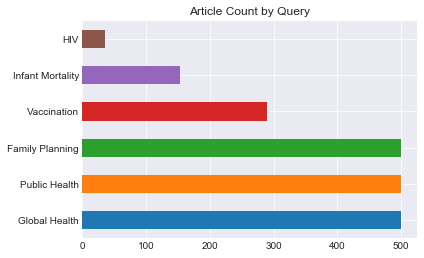

In [172]:
queries_df['query'].value_counts().plot.barh().set_title('Article Count by Query')

Text(0.5,1,'Article Count over Time')

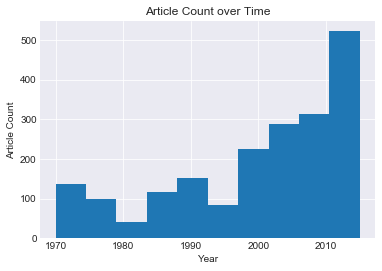

In [173]:
years=queries_df['year']
plt.hist(years)
plt.xlabel('Year')
plt.ylabel('Article Count')
plt.title('Article Count over Time')

Text(0.5,1,'Violin Plot of Articles by Query Type')

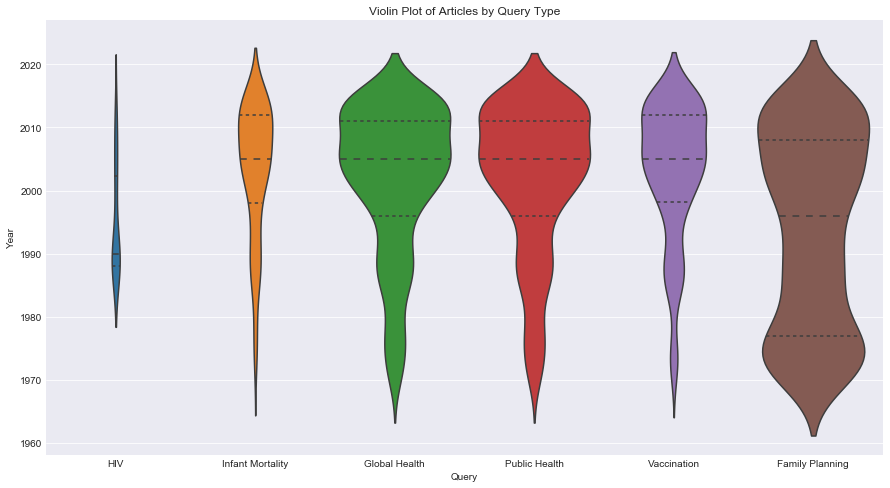

In [174]:
plt.figure(figsize=(15,8))
ax = sns.violinplot(x='query', y='year', inner='quartile',scale='count', data=queries_df)
plt.xlabel('Query')
plt.ylabel('Year')
plt.title('Violin Plot of Articles by Query Type')

##### Family planning returns the most articles and has been a big topic in the New York Times for the longest. Since 2000 however, the two most relevant queries are around Global Health and Public Health, making up the majority of the article count. 
##### HIV, as expected, has only been a factor since the 1980's, and Infant Mortality and Vaccination have grown in coverage since the mid 1990's as well. 

In [175]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
queries_df['snippet_sentiment'] = queries_df.apply (lambda row: analyzer.polarity_scores(row.snippet)['compound'],axis=1)
queries_df['snippet_sentiment_binary']=queries_df.apply (lambda row: 'Positive' if row.snippet_sentiment > 0 else 'Negative' ,axis=1)
queries_df.head()
#Want help deciding on a threshold

,abstract,date,desk,headline,id,locations,query,snippet,source,subjects,type,url,word_count,year,snippet_sentiment,snippet_sentiment_binary
0,NaN,1989-06-27,NaN,b'4 Cases Found Of Rare Strain Of AIDS Virus',4fd1a4018eb7c8105d6bbeb2,"['new york city', 'africa']",HIV,b'LEAD: Researchers have discovered several bl...,The New York Times,"['ACQUIRED IMMUNE DEFICIENCY SYNDROME (AIDS)',...",News,https://www.nytimes.com/1989/06/27/nyregion/4-...,1386,1989,0.3612,Positive
1,NaN,1991-03-03,NaN,b'INDIAN AIDS REPORT CITES SECOND VIRUS',4fd1a7a78eb7c8105d6c29cb,"['india', 'africa', 'united states']",HIV,b'An Indian specialist in sexually transmitted...,The New York Times,"['ACQUIRED IMMUNE DEFICIENCY SYNDROME (AIDS)',...",News,https://www.nytimes.com/1991/03/03/world/india...,862,1991,0.4588,Positive
2,NaN,1990-04-29,NaN,b'AIDS Linked to TB Outbreak in Africa',4fd1b8a68eb7c8105d6e0be6,['africa'],HIV,b'LEAD: To the dismay of public-health officia...,The New York Times,"['ACQUIRED IMMUNE DEFICIENCY SYNDROME (AIDS)',...",News,https://www.nytimes.com/1990/04/29/world/aids-...,875,1990,-0.6486,Negative
3,NaN,2008-05-08,NaN,b'Four Players Who Came Out of Africa Return t...,54813ffd38f0d874625c81da,"['nigeria', 'africa']",HIV,b'Four African football players made a charity...,The New York Times,"['Football', 'Philanthropy']",News,https://www.nytimes.com/2008/05/08/sports/foot...,967,2008,0.4215,Positive
4,NaN,1987-04-09,NaN,b'2 VIRTUALLY IDENTICAL VIRUSES PRESENT NEW AI...,4fd17c3e8eb7c8105d6753a1,['africa'],HIV,b'LEAD: A virus believed to be related to the ...,The New York Times,"['MONKEYS AND APES', 'ACQUIRED IMMUNE DEFICIEN...",News,https://www.nytimes.com/1987/04/09/us/2-virtua...,818,1987,0.0000,Negative


[Text(0,0,'1970'),
 Text(0,0,'1971'),
 Text(0,0,'1972'),
 Text(0,0,'1973'),
 Text(0,0,'1974'),
 Text(0,0,'1975'),
 Text(0,0,'1976'),
 Text(0,0,'1977'),
 Text(0,0,'1978'),
 Text(0,0,'1979'),
 Text(0,0,'1980'),
 Text(0,0,'1981'),
 Text(0,0,'1982'),
 Text(0,0,'1983'),
 Text(0,0,'1984'),
 Text(0,0,'1985'),
 Text(0,0,'1986'),
 Text(0,0,'1987'),
 Text(0,0,'1988'),
 Text(0,0,'1989'),
 Text(0,0,'1990'),
 Text(0,0,'1991'),
 Text(0,0,'1992'),
 Text(0,0,'1993'),
 Text(0,0,'1994'),
 Text(0,0,'1995'),
 Text(0,0,'1996'),
 Text(0,0,'1997'),
 Text(0,0,'1998'),
 Text(0,0,'1999'),
 Text(0,0,'2000'),
 Text(0,0,'2001'),
 Text(0,0,'2002'),
 Text(0,0,'2003'),
 Text(0,0,'2004'),
 Text(0,0,'2005'),
 Text(0,0,'2006'),
 Text(0,0,'2007'),
 Text(0,0,'2008'),
 Text(0,0,'2009'),
 Text(0,0,'2010'),
 Text(0,0,'2011'),
 Text(0,0,'2012'),
 Text(0,0,'2013'),
 Text(0,0,'2014'),
 Text(0,0,'2015')]

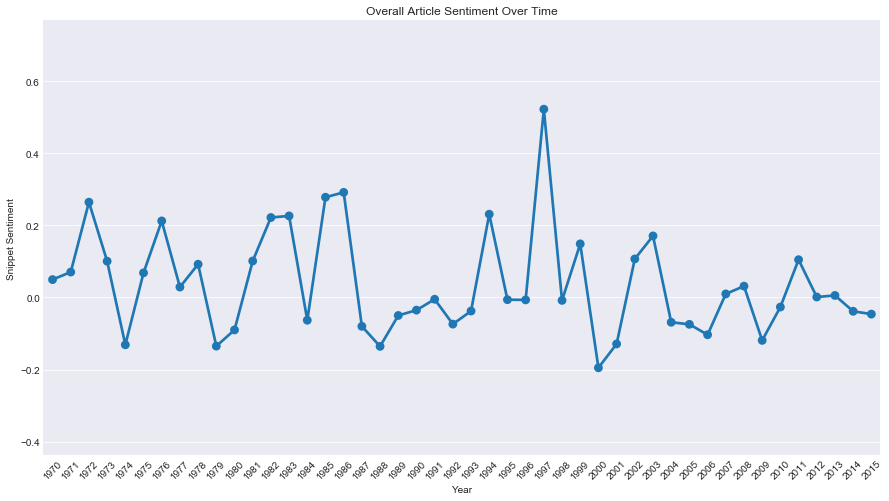

In [176]:
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
ax = sns.pointplot(x='year',y='snippet_sentiment',errwidth=0,data=queries_df)
plt.xlabel('Year')
plt.ylabel('Snippet Sentiment')
plt.title('Overall Article Sentiment Over Time')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
#ax.set_xticklabels(rotation=30)

[Text(0,0,'1970'),
 Text(0,0,'1971'),
 Text(0,0,'1972'),
 Text(0,0,'1973'),
 Text(0,0,'1974'),
 Text(0,0,'1975'),
 Text(0,0,'1976'),
 Text(0,0,'1977'),
 Text(0,0,'1978'),
 Text(0,0,'1979'),
 Text(0,0,'1980'),
 Text(0,0,'1981'),
 Text(0,0,'1982'),
 Text(0,0,'1983'),
 Text(0,0,'1984'),
 Text(0,0,'1985'),
 Text(0,0,'1986'),
 Text(0,0,'1987'),
 Text(0,0,'1988'),
 Text(0,0,'1989'),
 Text(0,0,'1990'),
 Text(0,0,'1991'),
 Text(0,0,'1992'),
 Text(0,0,'1993'),
 Text(0,0,'1994'),
 Text(0,0,'1995'),
 Text(0,0,'1996'),
 Text(0,0,'1997'),
 Text(0,0,'1998'),
 Text(0,0,'1999'),
 Text(0,0,'2000'),
 Text(0,0,'2001'),
 Text(0,0,'2002'),
 Text(0,0,'2003'),
 Text(0,0,'2004'),
 Text(0,0,'2005'),
 Text(0,0,'2006'),
 Text(0,0,'2007'),
 Text(0,0,'2008'),
 Text(0,0,'2009'),
 Text(0,0,'2010'),
 Text(0,0,'2011'),
 Text(0,0,'2012'),
 Text(0,0,'2013'),
 Text(0,0,'2014'),
 Text(0,0,'2015')]

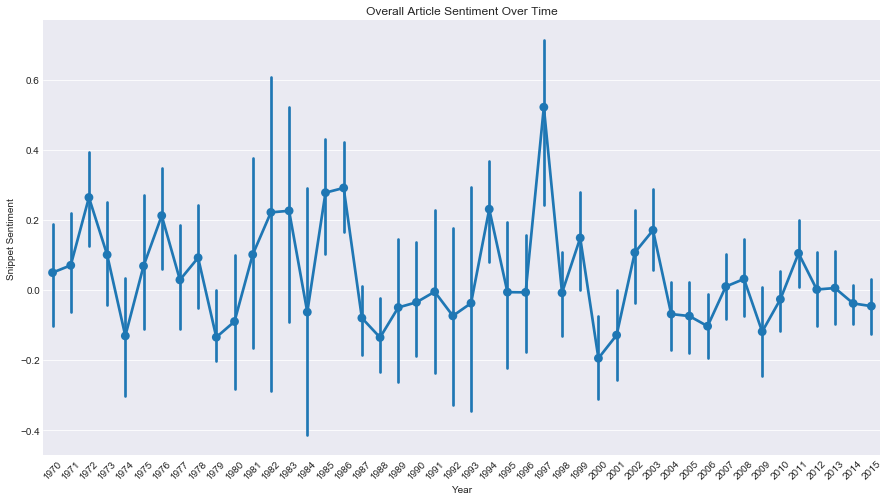

In [177]:
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
ax = sns.pointplot(x='year',y='snippet_sentiment',nboot=1000,data=queries_df)
plt.xlabel('Year')
plt.ylabel('Snippet Sentiment')
plt.title('Overall Article Sentiment Over Time')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
#fix x-axis

In [178]:
queries_df.head()

,abstract,date,desk,headline,id,locations,query,snippet,source,subjects,type,url,word_count,year,snippet_sentiment,snippet_sentiment_binary
0,NaN,1989-06-27,NaN,b'4 Cases Found Of Rare Strain Of AIDS Virus',4fd1a4018eb7c8105d6bbeb2,"['new york city', 'africa']",HIV,b'LEAD: Researchers have discovered several bl...,The New York Times,"['ACQUIRED IMMUNE DEFICIENCY SYNDROME (AIDS)',...",News,https://www.nytimes.com/1989/06/27/nyregion/4-...,1386,1989,0.3612,Positive
1,NaN,1991-03-03,NaN,b'INDIAN AIDS REPORT CITES SECOND VIRUS',4fd1a7a78eb7c8105d6c29cb,"['india', 'africa', 'united states']",HIV,b'An Indian specialist in sexually transmitted...,The New York Times,"['ACQUIRED IMMUNE DEFICIENCY SYNDROME (AIDS)',...",News,https://www.nytimes.com/1991/03/03/world/india...,862,1991,0.4588,Positive
2,NaN,1990-04-29,NaN,b'AIDS Linked to TB Outbreak in Africa',4fd1b8a68eb7c8105d6e0be6,['africa'],HIV,b'LEAD: To the dismay of public-health officia...,The New York Times,"['ACQUIRED IMMUNE DEFICIENCY SYNDROME (AIDS)',...",News,https://www.nytimes.com/1990/04/29/world/aids-...,875,1990,-0.6486,Negative
3,NaN,2008-05-08,NaN,b'Four Players Who Came Out of Africa Return t...,54813ffd38f0d874625c81da,"['nigeria', 'africa']",HIV,b'Four African football players made a charity...,The New York Times,"['Football', 'Philanthropy']",News,https://www.nytimes.com/2008/05/08/sports/foot...,967,2008,0.4215,Positive
4,NaN,1987-04-09,NaN,b'2 VIRTUALLY IDENTICAL VIRUSES PRESENT NEW AI...,4fd17c3e8eb7c8105d6753a1,['africa'],HIV,b'LEAD: A virus believed to be related to the ...,The New York Times,"['MONKEYS AND APES', 'ACQUIRED IMMUNE DEFICIEN...",News,https://www.nytimes.com/1987/04/09/us/2-virtua...,818,1987,0.0000,Negative


Text(0.5,1,'Violin Plot of Articles by Query Type Split by Snippet Sentiment')

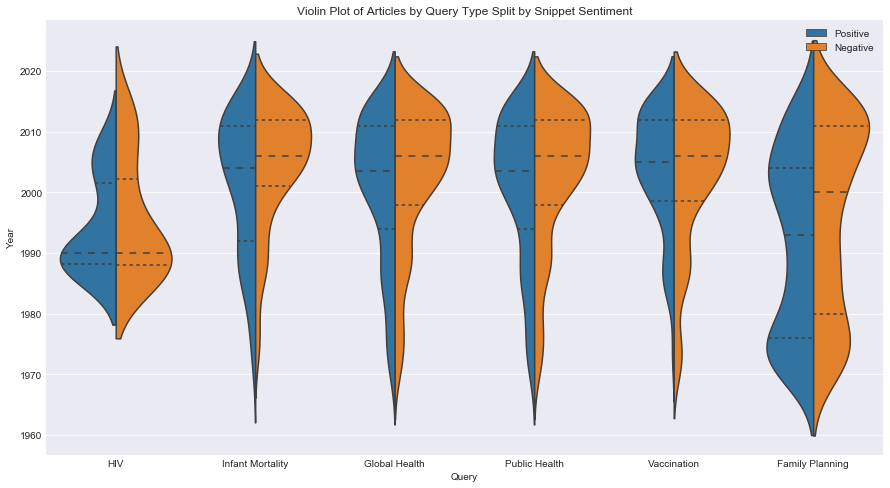

In [179]:
plt.figure(figsize=(15,8))
ax = sns.violinplot(x='query', y='year', inner='quartile',scale='count', hue='snippet_sentiment_binary', split=True, data=queries_df)
plt.xlabel('Query')
plt.ylabel('Year')
plt.legend()
plt.title('Violin Plot of Articles by Query Type Split by Snippet Sentiment')

#### Running a hypothesis test on the sentiment difference between our most negative category and the mean of the remaining categories
#### Null Hypothesis: The mean of the Infant Mortality sentiment (the most negative sentiment) is the same as the mean of the other queries' sentiments. 
#### Will perform a two-sample Z test for comparing two means to check the hypothesis, with alpha = 0.05. Therefore, if Z is > 1.96 or less than -1.96, we will reject the null hypothesis. 

In [180]:
overall_sentiment_mean=np.mean(queries_df.snippet_sentiment)
print('Overall Sentiment Average ' + str(overall_sentiment_mean))
queries_df_infant=queries_df.loc[queries_df['query'] == 'Infant Mortality']
infant_sentiment_mean=np.mean(queries_df_infant.snippet_sentiment)
print('Infant Mortality Sentiment Average ' + str(infant_sentiment_mean))
queries_df_excl_infant=queries_df.loc[queries_df['query'] != 'Infant Mortality']
excl_infant_sentiment_mean=np.mean(queries_df_excl_infant.snippet_sentiment)
print('Overall Sentiment Excluding Infant Mortality Average ' + str(excl_infant_sentiment_mean))

Overall Sentiment Average 0.002889388580090958
Infant Mortality Sentiment Average -0.048028104575163405
Overall Sentiment Excluding Infant Mortality Average 0.007155750273822565


In [181]:
var_infant=np.var(queries_df_infant.snippet_sentiment)
len_infant=len(queries_df_infant.snippet_sentiment)
var_excl_infant=np.var(queries_df_excl_infant.snippet_sentiment)
len_excl_infant=len(queries_df_excl_infant.snippet_sentiment)

In [182]:
z = (infant_sentiment_mean-excl_infant_sentiment_mean-0)/np.sqrt((var_infant/len_infant)+(var_excl_infant/len_excl_infant))
print('Z-Score is: ' + str(z))

Z-Score is: -1.3454547869479858


#### Therefore, we accept the null hypothesis, and the true mean of the Infant Mortality sentiment is equal to the true mean of the remaining queries' sentiment.

In [183]:
queries_df.locations[0]

"['new york city', 'africa']"

In [184]:
from ast import literal_eval
queries_df.locations=queries_df.locations.apply(lambda x: literal_eval(x))
queries_df.locations[0]

['new york city', 'africa']

In [185]:
locations=queries_df.locations
type(locations)
location_count=pd.get_dummies(locations.apply(pd.Series), prefix='', prefix_sep='').sum(level=0, axis=1)
location_count.head(30)


,abuja (nigeria),accra (ghana),afghanistan,africa,albania,algeria,angola,australia,bangui (central african republic),belgium,...,"china, nationalist",kano state (nigeria),kruger national park (south africa),new delhi (india),czech republic,limpopo national park (mozambique),russian republic (ussr),"upper volta, republic of",czechoslovakia,union of soviet socialist republics (ussr)
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [186]:
location_count['algeria']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1949    0
1950    0
1951    0
1952    0
1953    0
1954    1
1955    0
1956    0
1957    0
1958    0
1959    0
1960    0
1961    0
1962    0
1963    0
1964    0
1965    0
1966    0
1967    0
1968    0
1969    0
1970    0
1971    0
1972    0
1973    0
1974    0
1975    0
1976    0
1977    0
1978    0
Name: algeria, Length: 1979, dtype: uint8

In [187]:
regions.keys()

dict_keys(['Algeria', 'Egypt', 'Libya', 'Morocco', 'South Sudan', 'Sudan', 'Tunisia', 'Benin', 'Burkina Faso', 'Cape Verde', "Cote d'Ivoire", 'Gambia', 'Ghana', 'Guinea', 'Liberia', 'Mali', 'Mauritania', 'Niger', 'Nigeria', 'Saint Helena', 'Senegal', 'Sierra Leone', 'Togo', 'Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya', 'Madagascar', 'Malawi', 'Mauritius', 'Mayotte', 'Mozambique', 'Reunion', 'Rwanda', 'Seychelles', 'Somalia', 'Tanzania', 'Uganda', 'Zambia', 'Zimbabwe', 'Angola', 'Cameroon', 'Central African Republic', 'Chad', 'Congo', 'Congo Democratic Republic', 'Equatorial Guinea', 'Gabon', 'Sao Tome and Principe', 'Botswana', 'Lesotho', 'Namibia', 'South Africa', 'Swaziland'])

In [189]:
test_df=queries_df
countries=list(regions.keys())
for country in countries:
    if str(country) in df.columns:
        test_df[str(country)]=location_count[str(country).lower()]
test_df.head()

#Clear problem here is that only 9 of the 60+ countries are ever mentioned alone, and it seems to have happened very few times overall. 
#To solve this we'll need to break out any time when a country of interest was in the list of locations given
#That will be out of the scope for this project, so we will ignore location in our regression

,abstract,date,desk,headline,id,locations,query,snippet,source,subjects,type,url,word_count,year,snippet_sentiment,snippet_sentiment_binary
0,NaN,1989-06-27,NaN,b'4 Cases Found Of Rare Strain Of AIDS Virus',4fd1a4018eb7c8105d6bbeb2,"[new york city, africa]",HIV,b'LEAD: Researchers have discovered several bl...,The New York Times,"['ACQUIRED IMMUNE DEFICIENCY SYNDROME (AIDS)',...",News,https://www.nytimes.com/1989/06/27/nyregion/4-...,1386,1989,0.3612,Positive
1,NaN,1991-03-03,NaN,b'INDIAN AIDS REPORT CITES SECOND VIRUS',4fd1a7a78eb7c8105d6c29cb,"[india, africa, united states]",HIV,b'An Indian specialist in sexually transmitted...,The New York Times,"['ACQUIRED IMMUNE DEFICIENCY SYNDROME (AIDS)',...",News,https://www.nytimes.com/1991/03/03/world/india...,862,1991,0.4588,Positive
2,NaN,1990-04-29,NaN,b'AIDS Linked to TB Outbreak in Africa',4fd1b8a68eb7c8105d6e0be6,[africa],HIV,b'LEAD: To the dismay of public-health officia...,The New York Times,"['ACQUIRED IMMUNE DEFICIENCY SYNDROME (AIDS)',...",News,https://www.nytimes.com/1990/04/29/world/aids-...,875,1990,-0.6486,Negative
3,NaN,2008-05-08,NaN,b'Four Players Who Came Out of Africa Return t...,54813ffd38f0d874625c81da,"[nigeria, africa]",HIV,b'Four African football players made a charity...,The New York Times,"['Football', 'Philanthropy']",News,https://www.nytimes.com/2008/05/08/sports/foot...,967,2008,0.4215,Positive
4,NaN,1987-04-09,NaN,b'2 VIRTUALLY IDENTICAL VIRUSES PRESENT NEW AI...,4fd17c3e8eb7c8105d6753a1,[africa],HIV,b'LEAD: A virus believed to be related to the ...,The New York Times,"['MONKEYS AND APES', 'ACQUIRED IMMUNE DEFICIEN...",News,https://www.nytimes.com/1987/04/09/us/2-virtua...,818,1987,0.0000,Negative


In [198]:
queries_df.head()

,abstract,date,headline,id,locations,query,snippet,source,subjects,type,url,word_count,year,snippet_sentiment,snippet_sentiment_binary
0,NaN,1989-06-27,b'4 Cases Found Of Rare Strain Of AIDS Virus',4fd1a4018eb7c8105d6bbeb2,"[new york city, africa]",HIV,b'LEAD: Researchers have discovered several bl...,The New York Times,"['ACQUIRED IMMUNE DEFICIENCY SYNDROME (AIDS)',...",News,https://www.nytimes.com/1989/06/27/nyregion/4-...,1386,1989,0.3612,Positive
1,NaN,1991-03-03,b'INDIAN AIDS REPORT CITES SECOND VIRUS',4fd1a7a78eb7c8105d6c29cb,"[india, africa, united states]",HIV,b'An Indian specialist in sexually transmitted...,The New York Times,"['ACQUIRED IMMUNE DEFICIENCY SYNDROME (AIDS)',...",News,https://www.nytimes.com/1991/03/03/world/india...,862,1991,0.4588,Positive
2,NaN,1990-04-29,b'AIDS Linked to TB Outbreak in Africa',4fd1b8a68eb7c8105d6e0be6,[africa],HIV,b'LEAD: To the dismay of public-health officia...,The New York Times,"['ACQUIRED IMMUNE DEFICIENCY SYNDROME (AIDS)',...",News,https://www.nytimes.com/1990/04/29/world/aids-...,875,1990,-0.6486,Negative
3,NaN,2008-05-08,b'Four Players Who Came Out of Africa Return t...,54813ffd38f0d874625c81da,"[nigeria, africa]",HIV,b'Four African football players made a charity...,The New York Times,"['Football', 'Philanthropy']",News,https://www.nytimes.com/2008/05/08/sports/foot...,967,2008,0.4215,Positive
4,NaN,1987-04-09,b'2 VIRTUALLY IDENTICAL VIRUSES PRESENT NEW AI...,4fd17c3e8eb7c8105d6753a1,[africa],HIV,b'LEAD: A virus believed to be related to the ...,The New York Times,"['MONKEYS AND APES', 'ACQUIRED IMMUNE DEFICIEN...",News,https://www.nytimes.com/1987/04/09/us/2-virtua...,818,1987,0.0000,Negative


In [199]:
#queries_df=queries_df.drop(columns=['desk'])
queries_df.head()

,abstract,date,headline,id,locations,query,snippet,source,subjects,type,url,word_count,year,snippet_sentiment,snippet_sentiment_binary
0,NaN,1989-06-27,b'4 Cases Found Of Rare Strain Of AIDS Virus',4fd1a4018eb7c8105d6bbeb2,"[new york city, africa]",HIV,b'LEAD: Researchers have discovered several bl...,The New York Times,"['ACQUIRED IMMUNE DEFICIENCY SYNDROME (AIDS)',...",News,https://www.nytimes.com/1989/06/27/nyregion/4-...,1386,1989,0.3612,Positive
1,NaN,1991-03-03,b'INDIAN AIDS REPORT CITES SECOND VIRUS',4fd1a7a78eb7c8105d6c29cb,"[india, africa, united states]",HIV,b'An Indian specialist in sexually transmitted...,The New York Times,"['ACQUIRED IMMUNE DEFICIENCY SYNDROME (AIDS)',...",News,https://www.nytimes.com/1991/03/03/world/india...,862,1991,0.4588,Positive
2,NaN,1990-04-29,b'AIDS Linked to TB Outbreak in Africa',4fd1b8a68eb7c8105d6e0be6,[africa],HIV,b'LEAD: To the dismay of public-health officia...,The New York Times,"['ACQUIRED IMMUNE DEFICIENCY SYNDROME (AIDS)',...",News,https://www.nytimes.com/1990/04/29/world/aids-...,875,1990,-0.6486,Negative
3,NaN,2008-05-08,b'Four Players Who Came Out of Africa Return t...,54813ffd38f0d874625c81da,"[nigeria, africa]",HIV,b'Four African football players made a charity...,The New York Times,"['Football', 'Philanthropy']",News,https://www.nytimes.com/2008/05/08/sports/foot...,967,2008,0.4215,Positive
4,NaN,1987-04-09,b'2 VIRTUALLY IDENTICAL VIRUSES PRESENT NEW AI...,4fd17c3e8eb7c8105d6753a1,[africa],HIV,b'LEAD: A virus believed to be related to the ...,The New York Times,"['MONKEYS AND APES', 'ACQUIRED IMMUNE DEFICIEN...",News,https://www.nytimes.com/1987/04/09/us/2-virtua...,818,1987,0.0000,Negative


In [208]:
import statsmodels.formula.api as smf
res = smf.ols(formula='snippet_sentiment ~ C(source) + year + word_count + C(type) + C(query)', data=queries_df).fit()
print(res.params)

Intercept                                    4.773534
C(source)[T.International Herald Tribune]    0.209780
C(source)[T.The New York Times]              0.178591
C(type)[T.An Analysis; News Analysis]        1.195899
C(type)[T.Article]                           0.703025
C(type)[T.Biography]                         0.582375
C(type)[T.Blog]                              0.753407
C(type)[T.Brief]                             0.641220
C(type)[T.Correction]                        0.299317
C(type)[T.Editorial]                         0.797518
C(type)[T.Front Page]                        0.773674
C(type)[T.Interactive Feature]               1.187575
C(type)[T.Interview]                         0.214644
C(type)[T.Letter]                            0.762121
C(type)[T.News]                              0.693049
C(type)[T.Obituary]                          0.378109
C(type)[T.Obituary; Biography]               1.042969
C(type)[T.Op-Ed]                             0.780917
C(type)[T.Question]         

In [209]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      snippet_sentiment   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.918
Date:                Thu, 26 Jul 2018   Prob (F-statistic):            0.00203
Time:                        20:12:47   Log-Likelihood:                -1256.9
No. Observations:                1975   AIC:                             2576.
Df Residuals:                    1944   BIC:                             2749.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

#### Only two variables with a p-value less than .05 are the Infant Mortality Query, and the Year. Clearly indicates that Infant Mortality is the most negative query, and that articles become more negative over time -- at a rate of -0.0028 sentiment points per year.

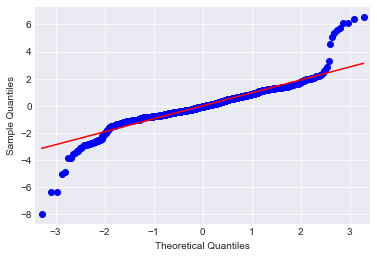

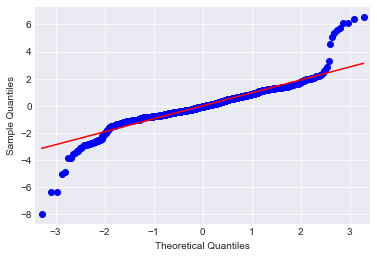

In [213]:
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats
qqplot(res.fittedvalues, dist=stats.norm, scale=1, fit=True, line='r', ax=None)


C:\Users\darre\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:309: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
C:\Users\darre\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\darre\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\darre\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\darre\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: RuntimeWarning: invalid value encountered in reduce
  return getattr(obj, method)(*args, **k

ValueError: cannot convert float NaN to integer

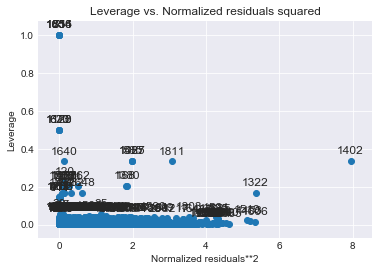

ValueError: cannot convert float NaN to integer

In [214]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(res)
influence_plot(res)
#can't deal with NaN's

In [71]:
'''articles_per_desk=pd.pivot_table(queries_df,values=snippet,index=['desk'],aggfunc='count').sort_values(id,ascending=False)
articles_per_desk.head(10).plot(kind='bar',title='Articles per NYT News Desk').xlabel('Desk').ylabel('Articles')
#There was a long-tail so only looked at top 10
#Interestingly they changed from Foreign to Foreign Desk, will need to combine those if filtering'''

"articles_per_desk=pd.pivot_table(queries_df,values=snippet,index=['desk'],aggfunc='count').sort_values(id,ascending=False)\narticles_per_desk.head(10).plot(kind='bar',title='Articles per NYT News Desk').xlabel('Desk').ylabel('Articles')\n#There was a long-tail so only looked at top 10\n#Interestingly they changed from Foreign to Foreign Desk, will need to combine those if filtering"

In [72]:
#need to break out lists so we can use pivot tables on them
articles_per_desk=pd.pivot_table(queries_df,values='headline',index=['locations'],aggfunc='count').sort_values('headline',ascending=False)
articles_per_desk.head(10).plot(kind='bar',title='Articles per Location')

TypeError: unhashable type: 'list'

In [ ]:
#https://machinelearningmastery.com/handle-missing-data-python/